# Market Trends Analysis

Analysis of Iranian market trends including stocks, gold, currency, and cryptocurrency.

In [1]:
import pandas as pd
from persiantools.jdatetime import JalaliDate

from src import (
    # Config
    DB_FILE, EVENTS_FILE, START_DATE, END_DATE,
    MARKET_NAMES, WEEKDAYS, COLORS,
    get_market_persian_name,
    # Data loading
    load_market_data, load_events,
    # Transformers
    enrich_dataframe, translate_market_names,
    calculate_growth_rate, calculate_market_rankings,
    get_top_markets, calculate_seasonal_influence,
    # Charts
    set_custom_output_height, plot_stacked_bar_chart,
    plot_correlation_heatmap, plot_market_comparison,
    plot_data_existence, plot_market_trend,
    plot_yearly_trends_subplots, plot_rankings_heatmap,
)

# Load and Prepare Data

In [2]:
# Load data
df = load_market_data()
events_df = load_events()

# Enrich with date columns
df = enrich_dataframe(df)
df

id jalali_date    market_type   closing  jalali_year jalali_month  \
32     33.0  1395-01-07         Bourse   81200.3         1395           01   
33     34.0  1395-01-08         Bourse   81261.0         1395           01   
34     35.0  1395-01-09         Bourse   80935.7         1395           01   
35     36.0  1395-01-10         Bourse   80561.3         1395           01   
36     37.0  1395-01-11         Bourse   81480.4         1395           01   
...     ...         ...            ...       ...          ...          ...   
53701   NaN  1403-11-16  Sandoghe-Aiar  163712.0         1403           11   
53702   NaN  1403-11-17  Sandoghe-Aiar  168849.0         1403           11   
53703   NaN  1403-11-23  Sandoghe-Aiar  181346.0         1403           11   
53704   NaN  1403-11-27  Sandoghe-Aiar  184158.0         1403           11   
53705   NaN  1403-11-21  Sandoghe-Aiar  185418.0         1403           11   

      jalali_year_month jalali_season jalali_week_day jalali_2_year_period  \
32              1395-01          بهار         Shanbeh            1394-1395   
33              1395-01          بهار      Yekshanbeh            1394-1395   
34              1395-01          بهار       Doshanbeh            1394-1395   
35              1395-01          بهار       Seshanbeh            1394-1395   
36              1395-01          بهار   Chaharshanbeh            1394-1395   
...                 ...           ...             ...                  ...   
53701           1403-11        زمستان       Seshanbeh            1402-1403   
53702           1403-11        زمستان   Chaharshanbeh            1402-1403   
53703           1403-11        زمستان       Seshanbeh            1402-1403   
53704           1403-11        زمستان         Shanbeh            1402-1403   
53705           1403-11        زمستان      Yekshanbeh            1402-1403   

       ... jalali_4_year_period gregorian_date gregorian_year  \
32     ...  1392-1393-1394-1395     2016-03-26           2016   
33     ...  1392-1393-1394-1395     2016-03-27           2016   
34     ...  1392-1393-1394-1395     2016-03-28           2016   
35     ...  1392-1393-1394-1395     2016-03-29           2016   
36     ...  1392-1393-1394-1395     2016-03-30           2016   
...    ...                  ...            ...            ...   
53701  ...  1400-1401-1402-1403     2025-02-04           2025   
53702  ...  1400-1401-1402-1403     2025-02-05           2025   
53703  ...  1400-1401-1402-1403     2025-02-11           2025   
53704  ...  1400-1401-1402-1403     2025-02-15           2025   
53705  ...  1400-1401-1402-1403     2025-02-09           2025   

       gregorian_month gregorian_year_month gregorian_season  \
32                  03              2016-03           spring   
33                  03              2016-03           spring   
34                  03              2016-03           spring   
35                  03              2016-03           spring   
36                  03              2016-03           spring   
...                ...                  ...              ...   
53701               02              2025-02           spring   
53702               02              2025-02           spring   
53703               02              2025-02           spring   
53704               02              2025-02           spring   
53705               02              2025-02           spring   

      gregorian_week_day gregorian_2_year_period gregorian_3_year_period  \
32              Saturday               2016-2017          2016-2017-2018   
33                Sunday               2016-2017          2016-2017-2018   
34                Monday               2016-2017          2016-2017-2018   
35               Tuesday               2016-2017          2016-2017-2018   
36             Wednesday               2016-2017          2016-2017-2018   
...                  ...                     ...                     ...   
53701            Tuesday               2024-2025     

# Data Existence Chart

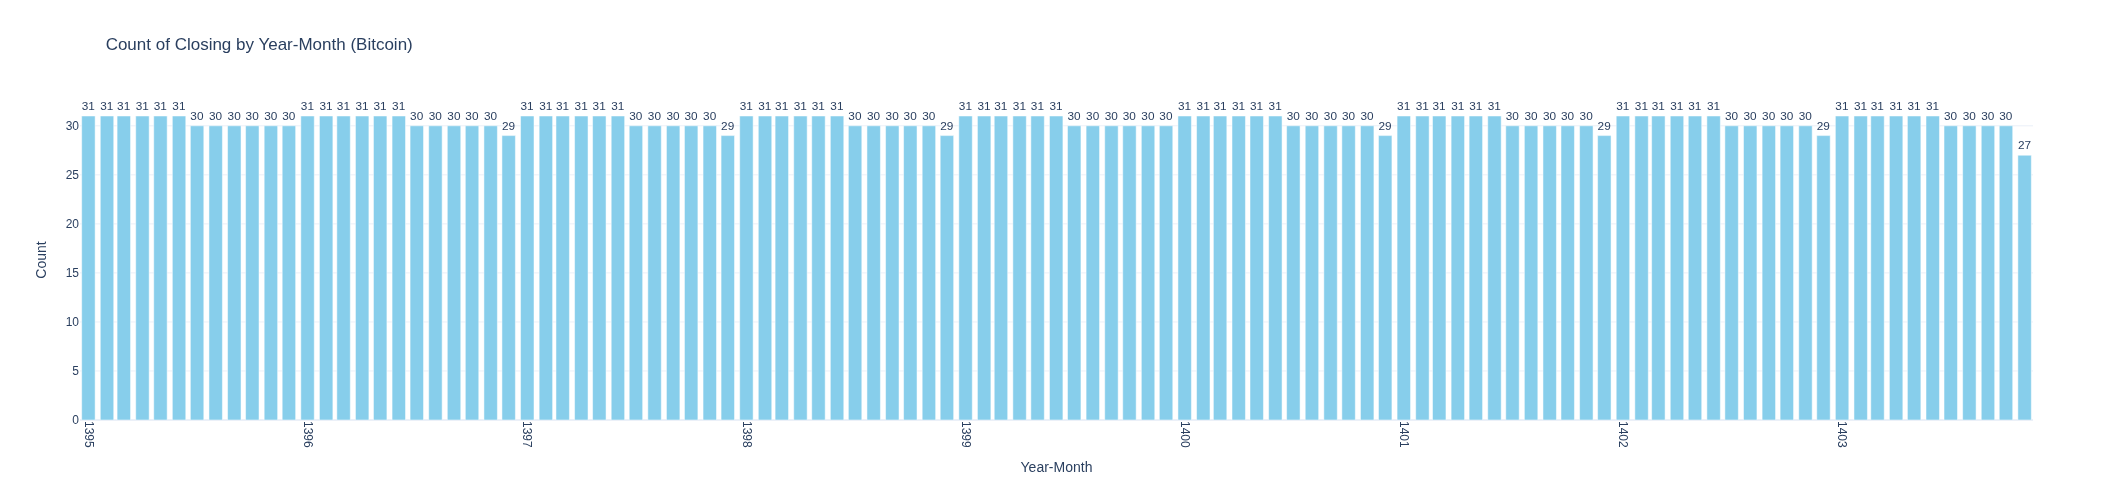

In [3]:
# Bitcoin data availability
import plotly.express as px

result = df[df['market_type'] == 'Bitcoin'].groupby('jalali_year_month')['closing'].count().reset_index()

fig = px.bar(
    result,
    x='jalali_year_month',
    y='closing',
    title='Count of Closing by Year-Month (Bitcoin)',
    labels={'year_month': 'Year-Month', 'closing': 'Count'},
    text='closing'
)
fig.update_traces(marker_color='skyblue', textposition='outside')
fig.update_layout(
    xaxis_title='Year-Month',
    yaxis_title='Count',
    xaxis_tickangle=90,
    template='plotly_white',
    height=500
)
fig.show()

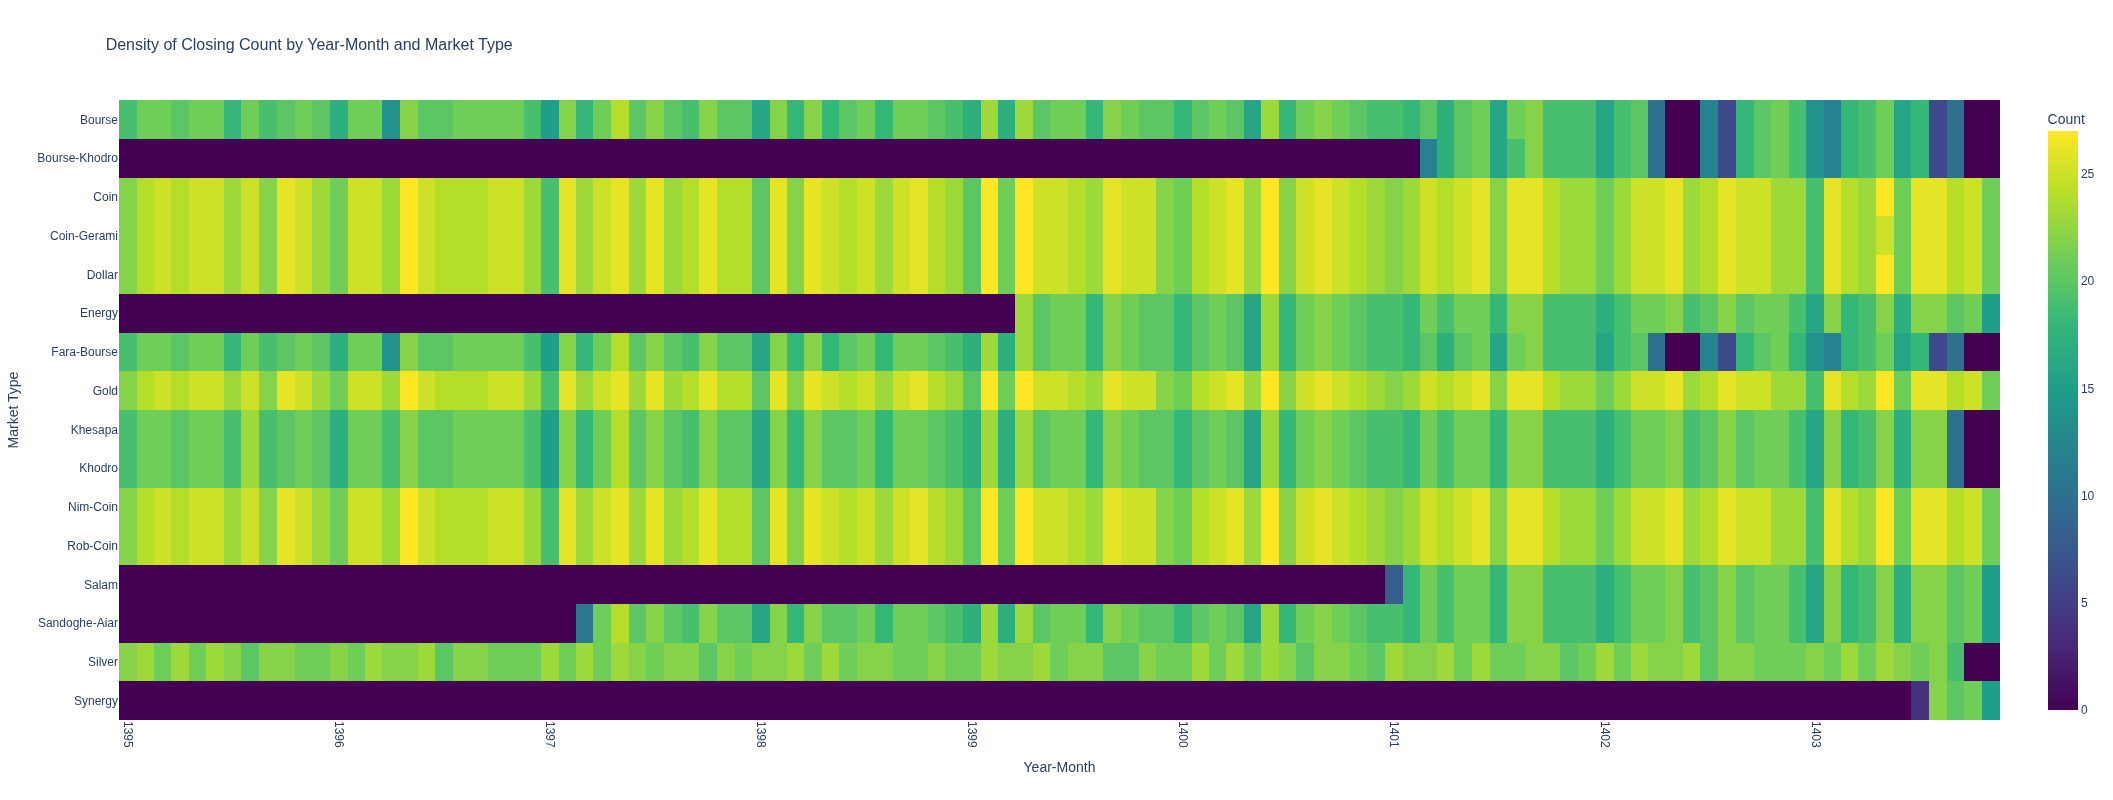

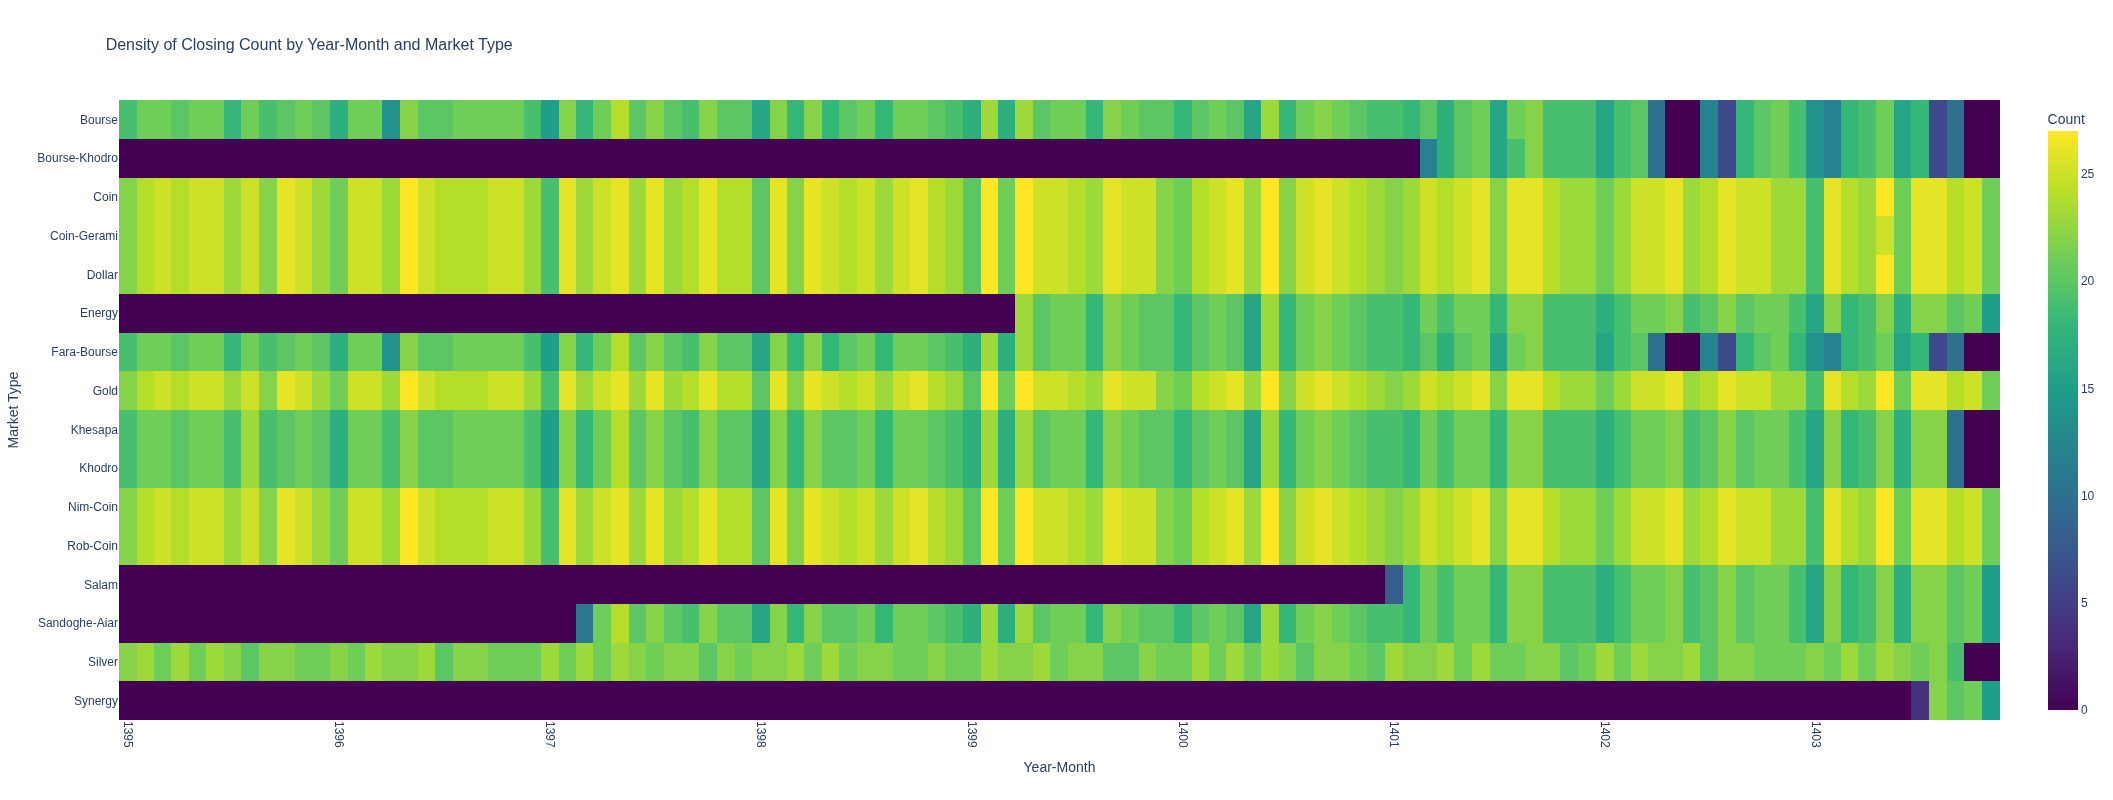

In [4]:
# Data existence heatmap for all markets (excluding Bitcoin)
plot_data_existence(df, exclude_markets=['Bitcoin'])

# Compare All Markets

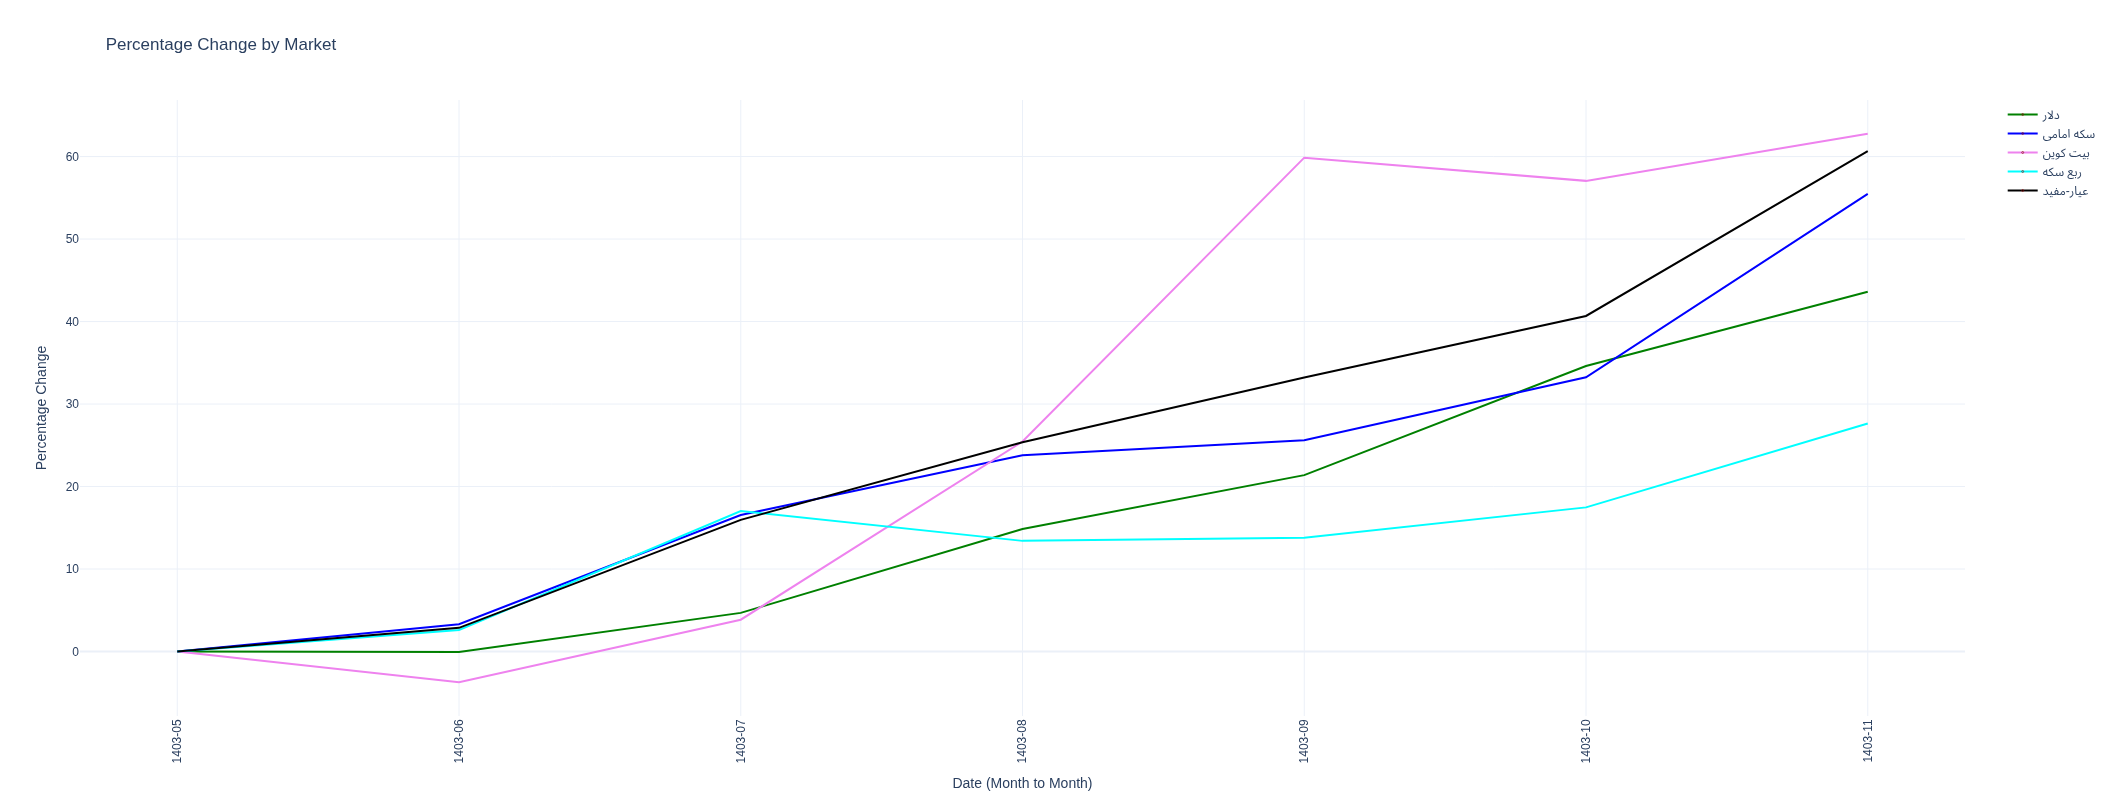

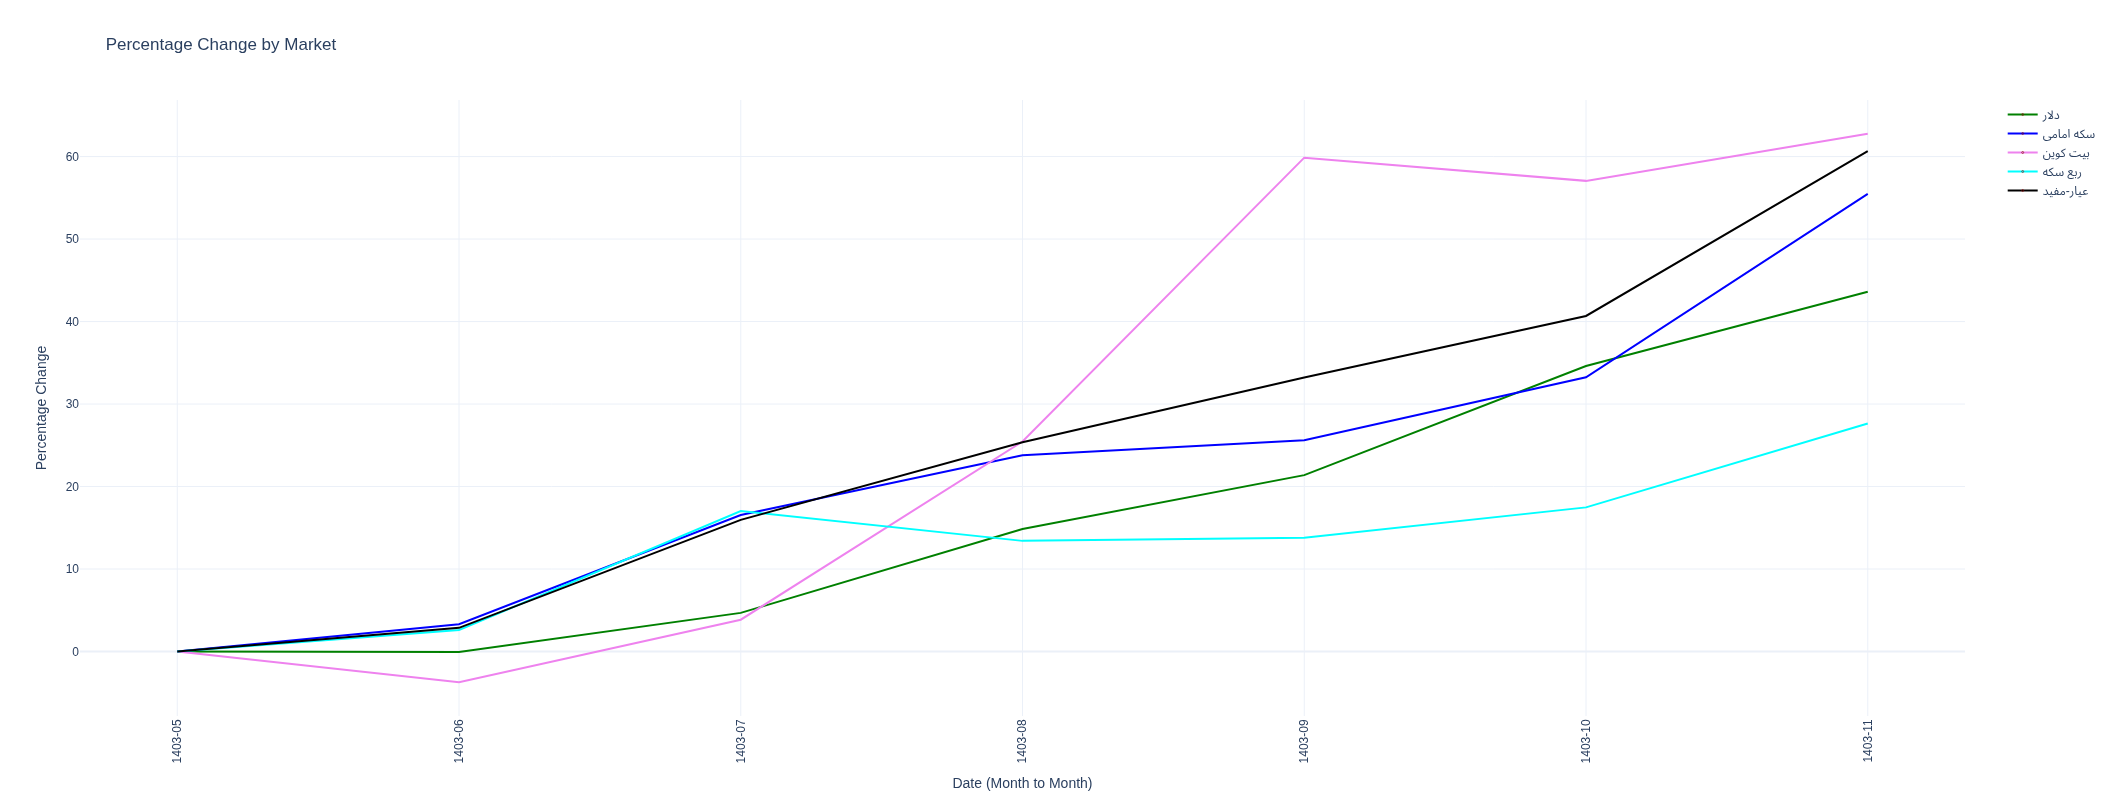

In [5]:
markets = [
    "Sandoghe-Aiar",
    "Dollar",
    "Coin",
    "Bitcoin",
    "Rob-Coin",
]

date_filter = JalaliDate(1403, 5, 1)

set_custom_output_height(800)
plot_market_comparison(
    df,update
    markets=markets,
    date_filter=date_filter,
    events_df=events_df,
)

# Market Trend

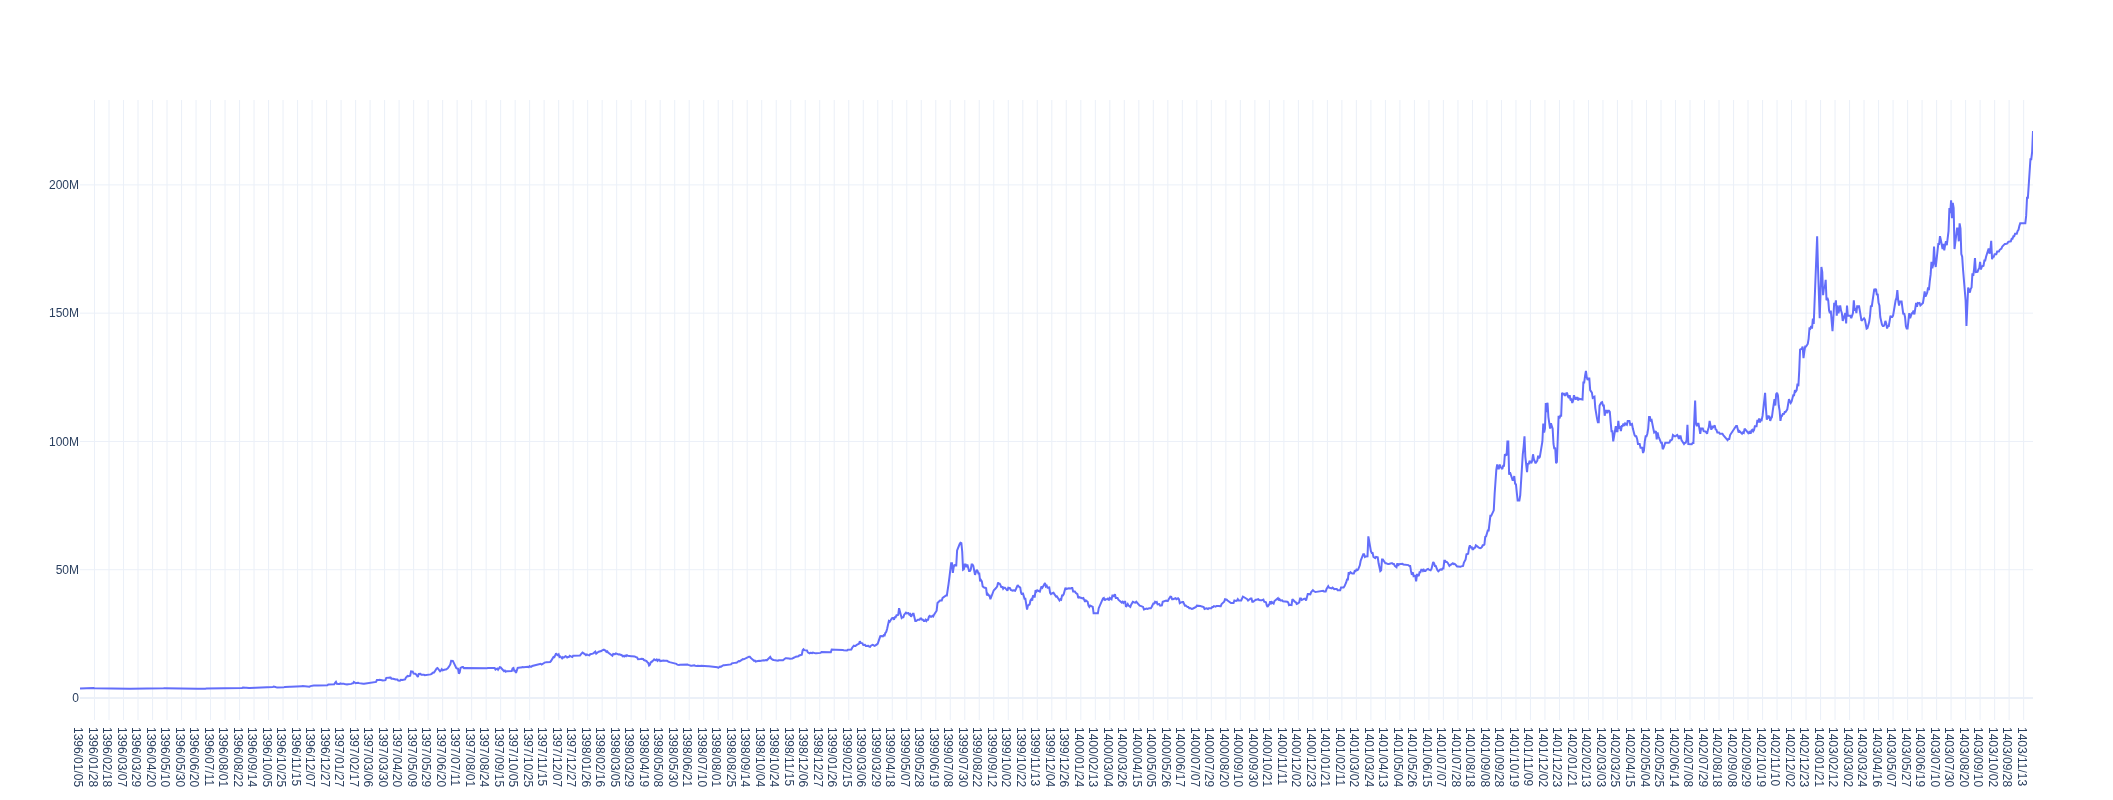

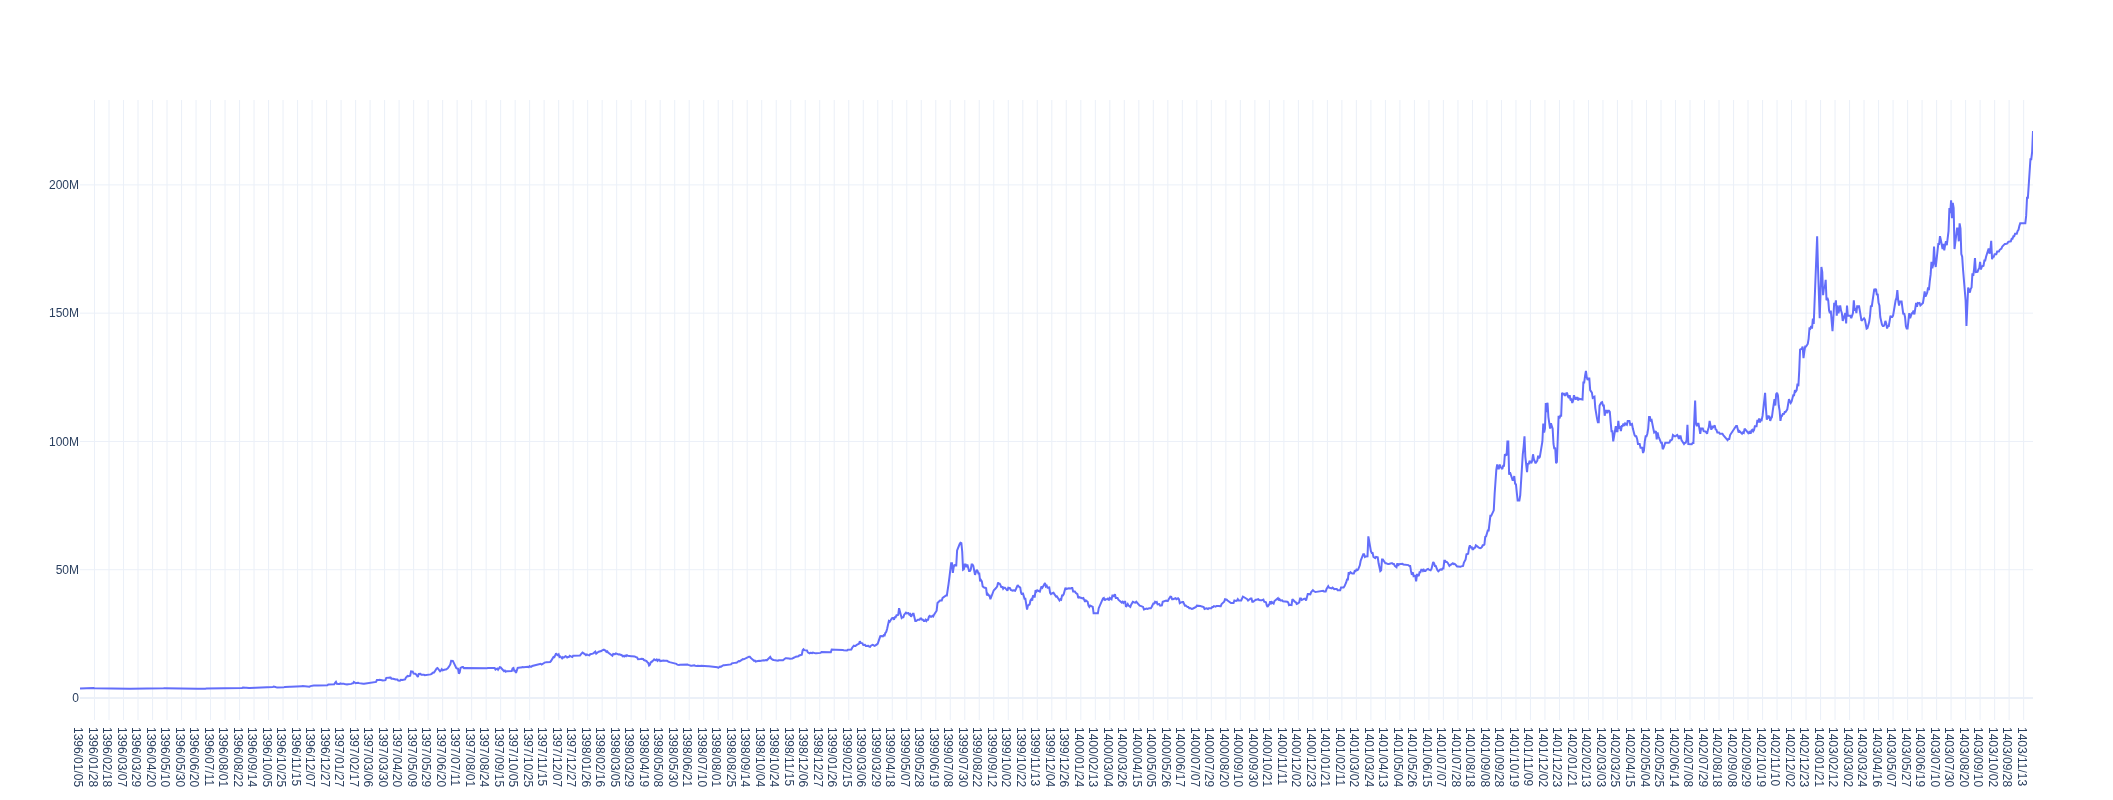

In [6]:
plot_market_trend(df, market='Rob-Coin', start_date=JalaliDate(1396, 1, 1))

# Correlation Between Markets

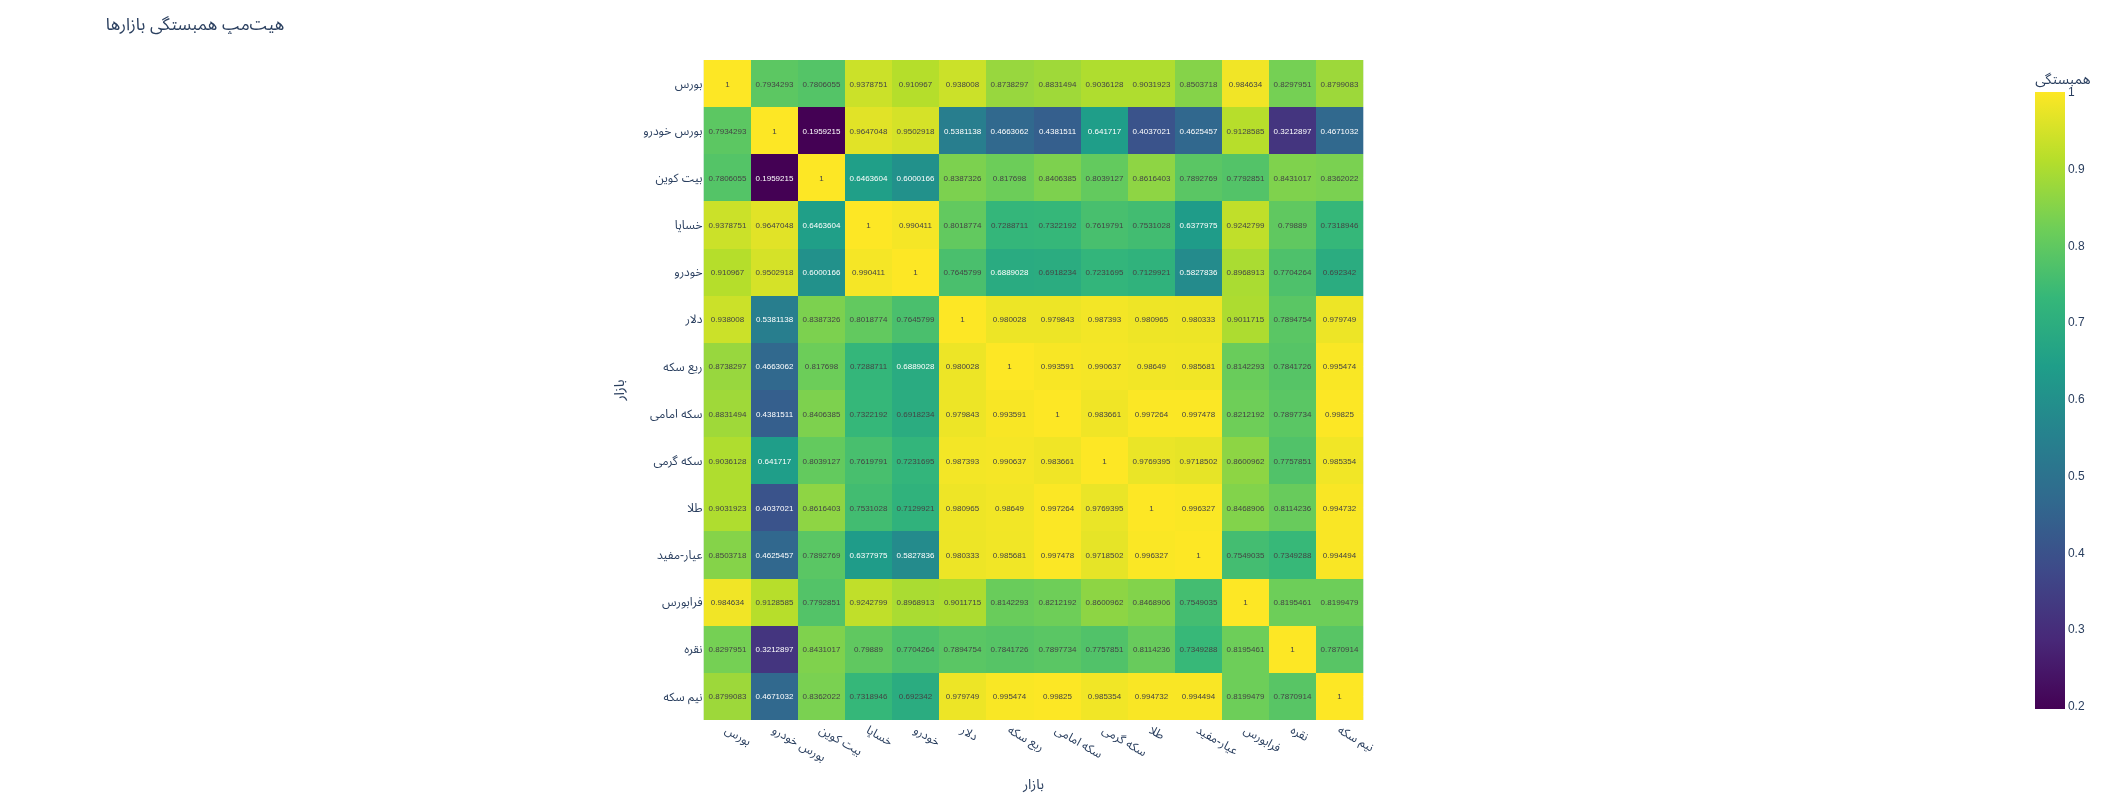

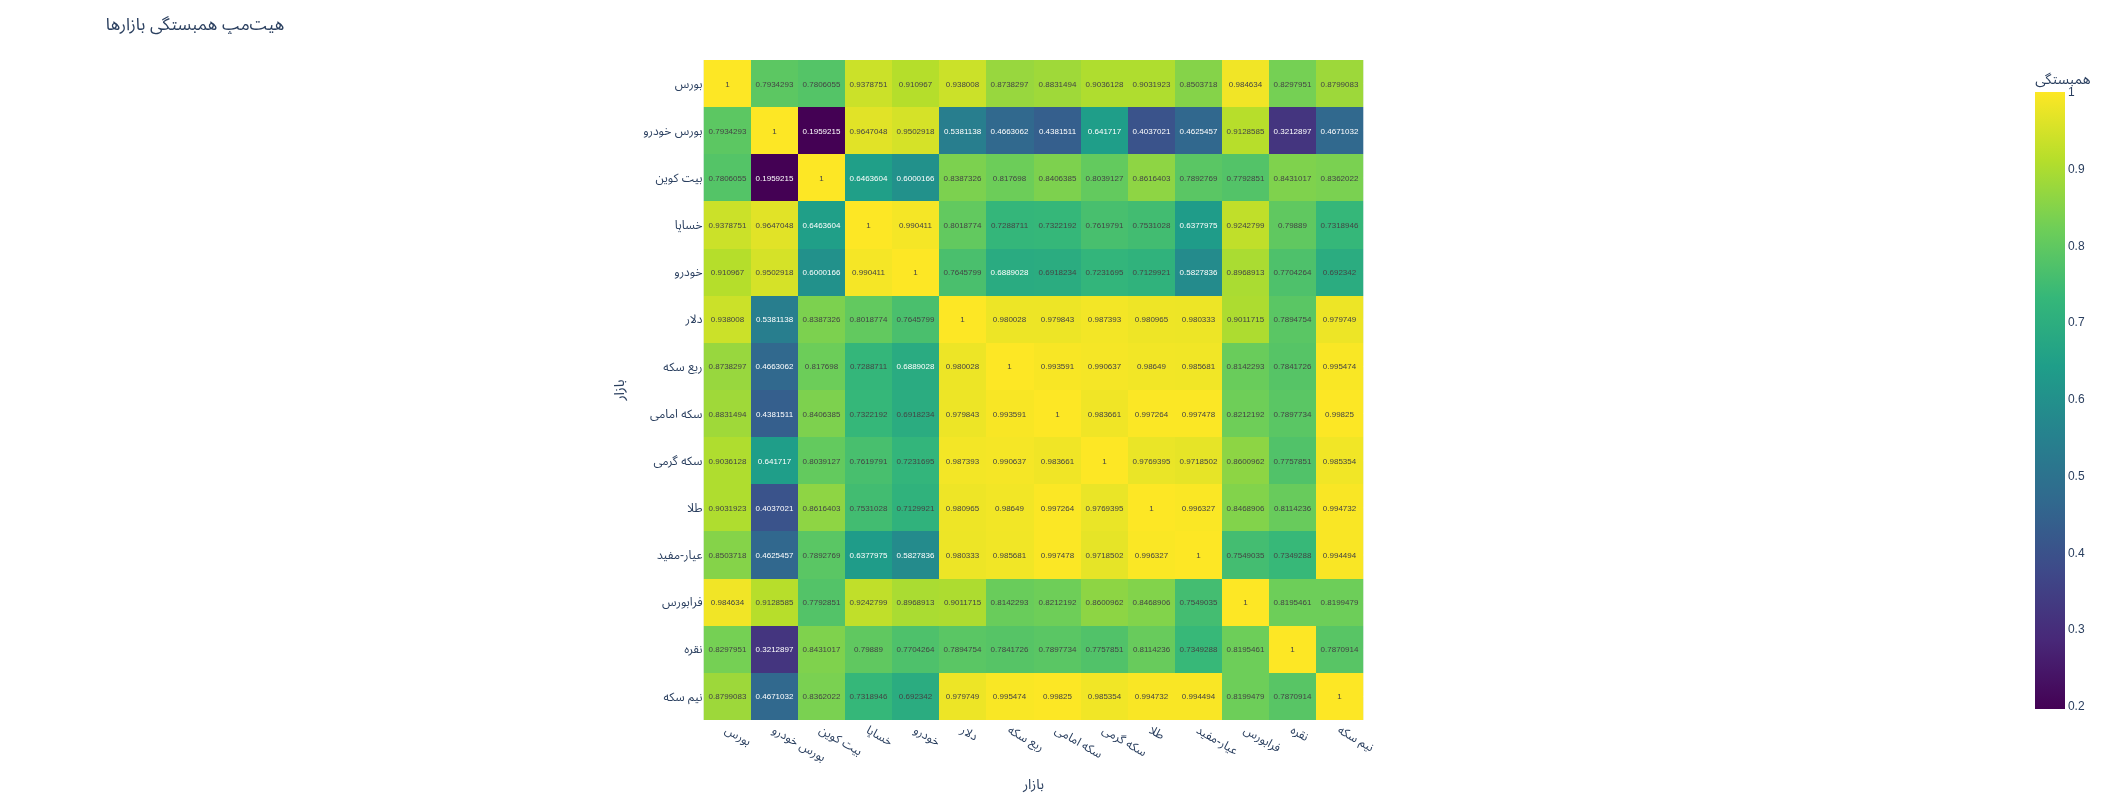

In [7]:
correlation_markets = [
    "Sandoghe-Aiar", "Bourse", "Fara-Bourse", "Gold", "Dollar",
    "Coin", "Nim-Coin", "Coin-Gerami", "Bitcoin", "Rob-Coin",
    "Bourse-Khodro", "Khesapa", "Khodro", "Silver",
]

set_custom_output_height(800)
plot_correlation_heatmap(df, markets=correlation_markets)

# Yearly Growth Rate

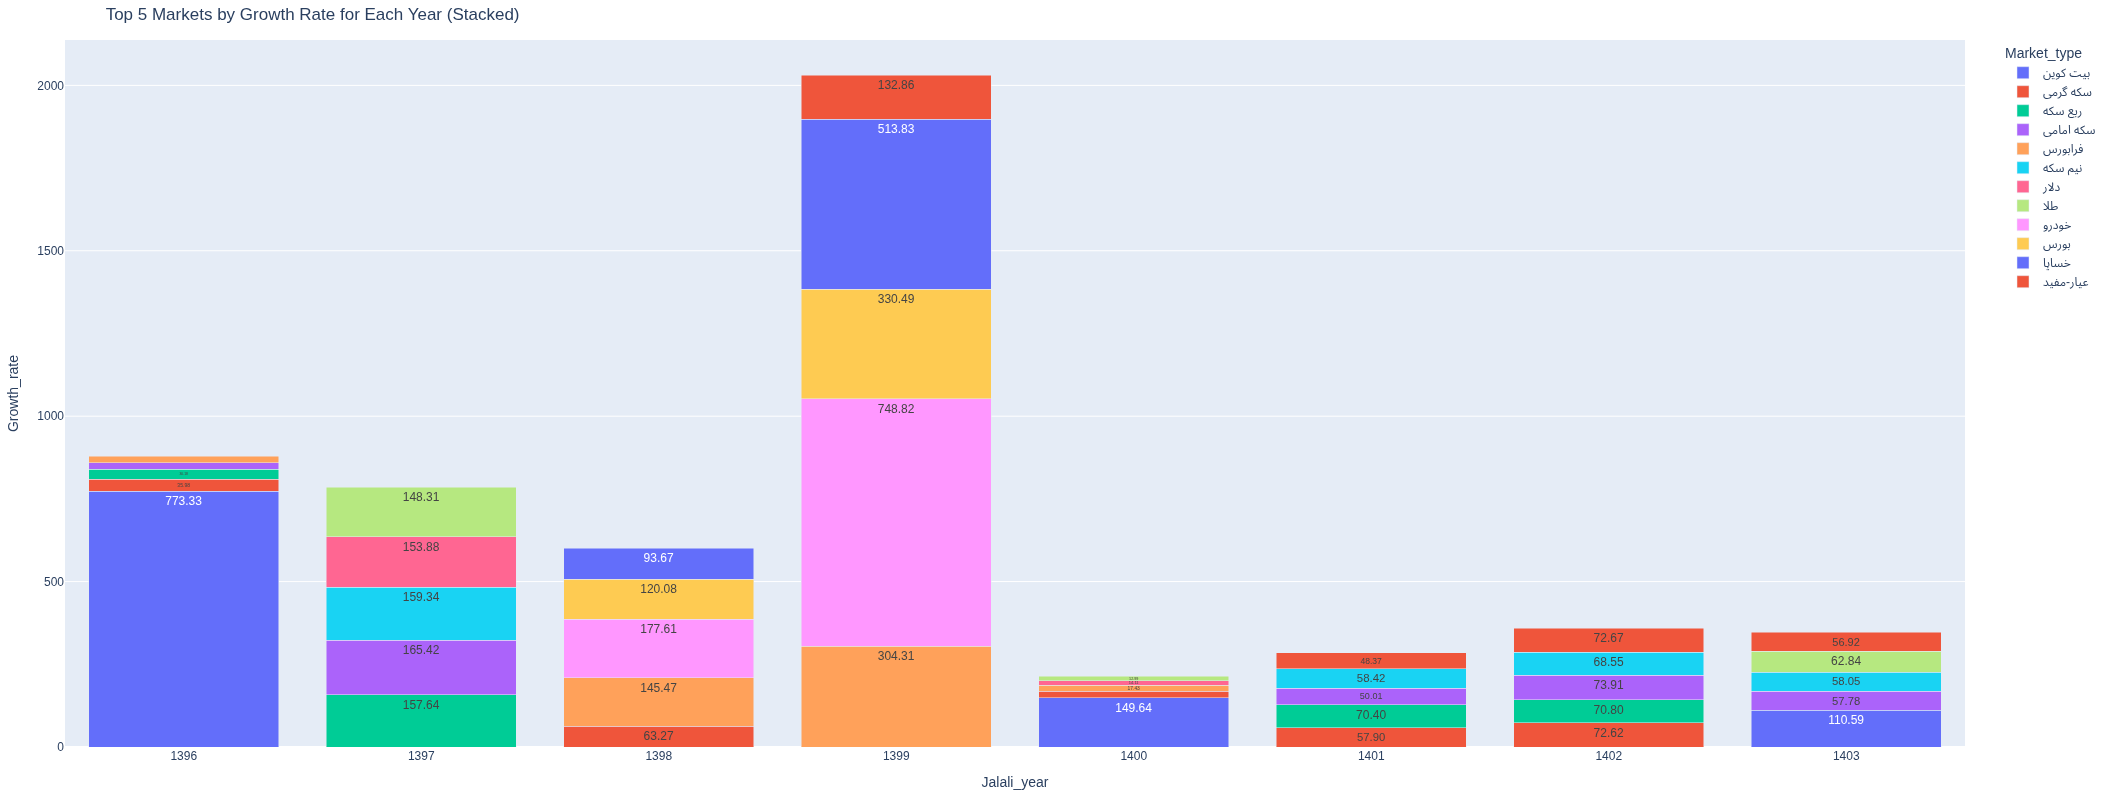

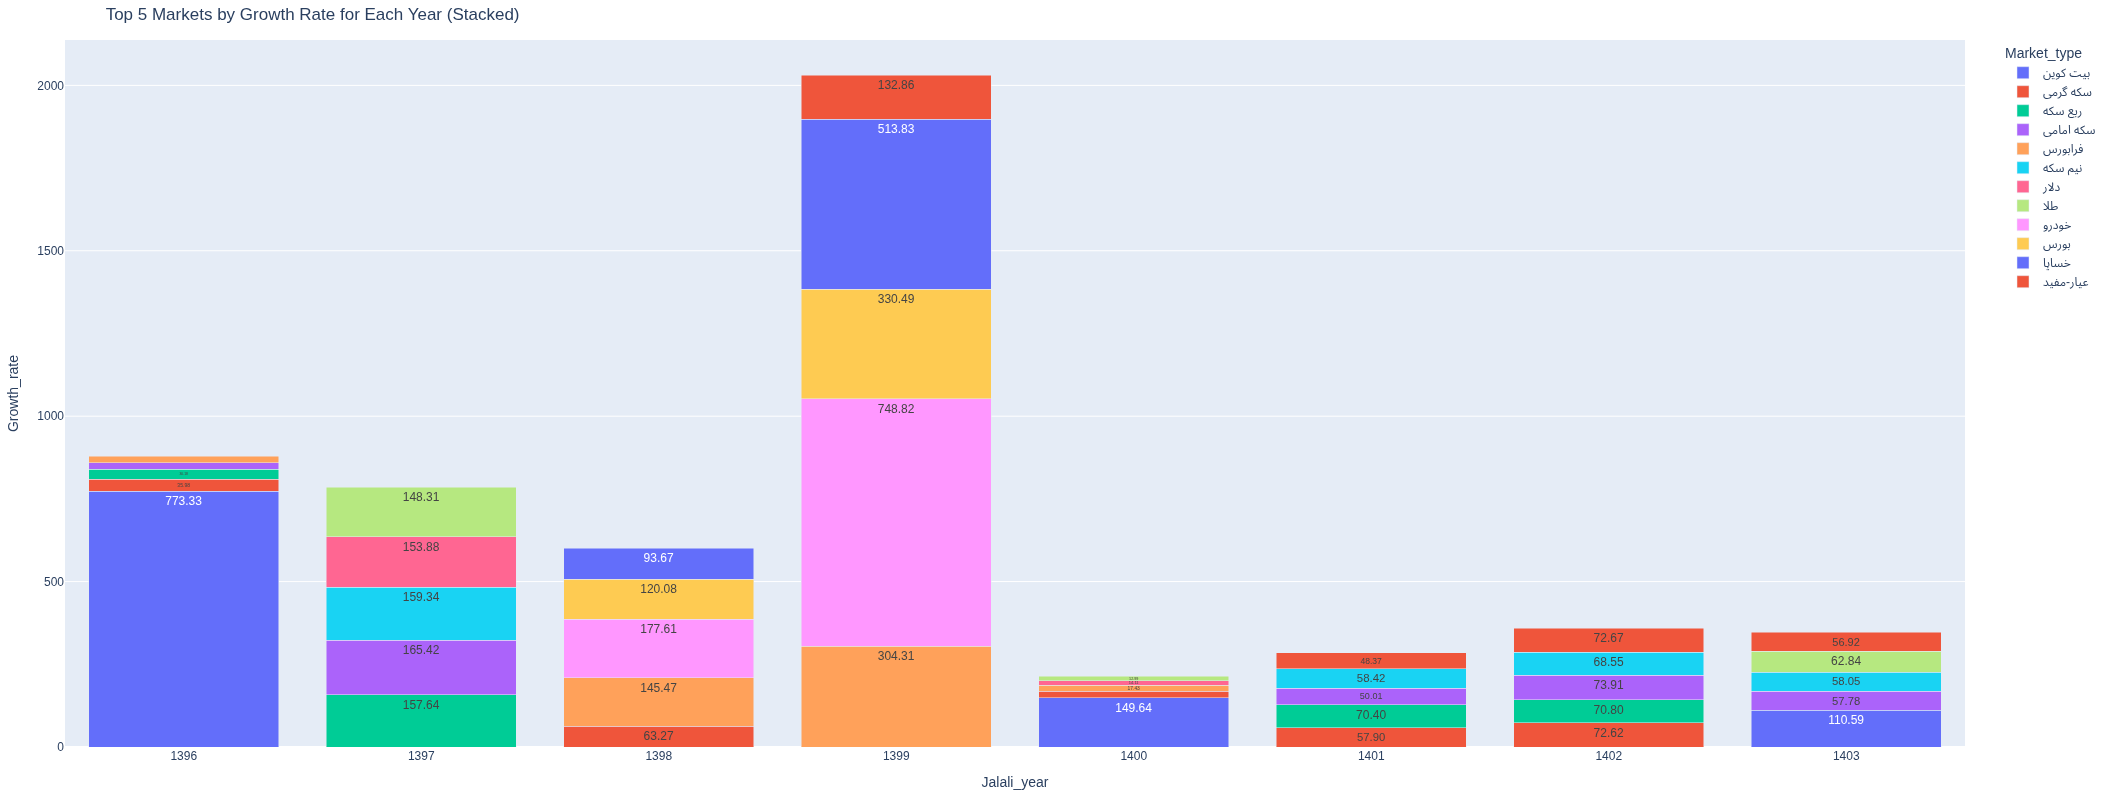

In [8]:
yearly_growth = calculate_growth_rate(df, ['market_type', 'jalali_year'])
yearly_growth = get_top_markets(yearly_growth, 'jalali_year', n=5)
yearly_growth = translate_market_names(yearly_growth)
yearly_growth = yearly_growth[yearly_growth['jalali_year'] != 1395]

set_custom_output_height(800)
plot_stacked_bar_chart(
    df=yearly_growth,
    x_col='jalali_year',
    y_col='growth_rate',
    color_col='market_type',
    title='Top 5 Markets by Growth Rate for Each Year (Stacked)',
    labels={'growth_rate': 'Growth Rate (%)', 'year': 'Year'}
)

# Yearly Markets Rank

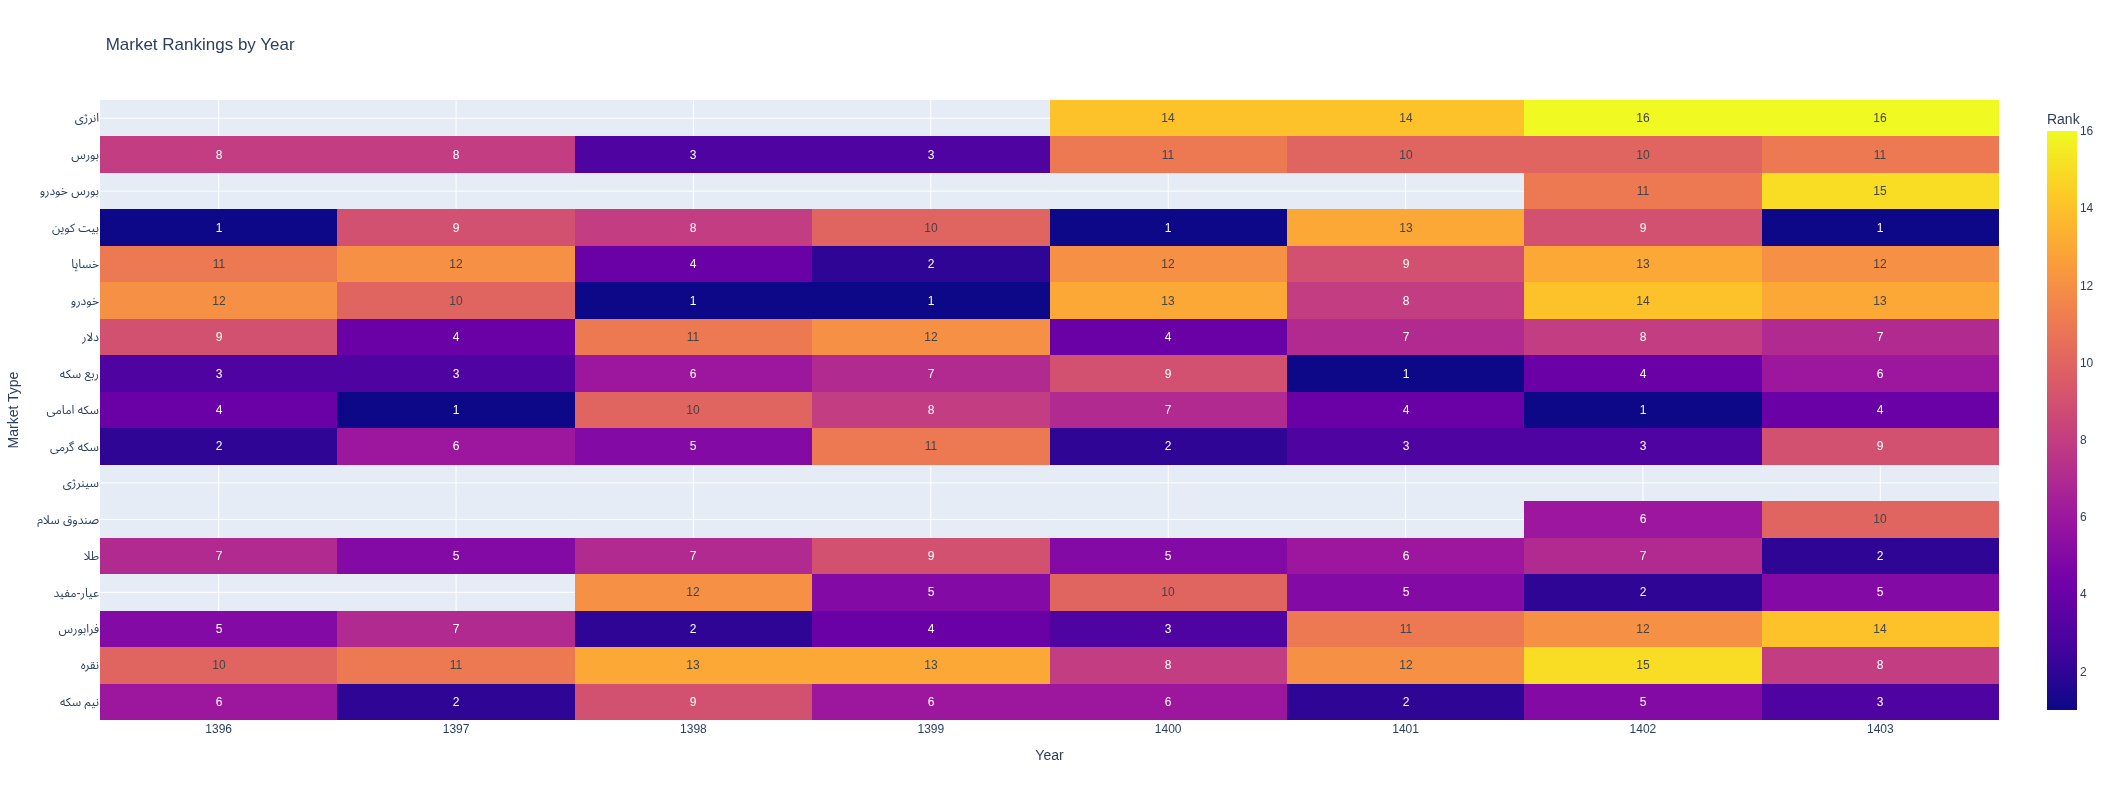

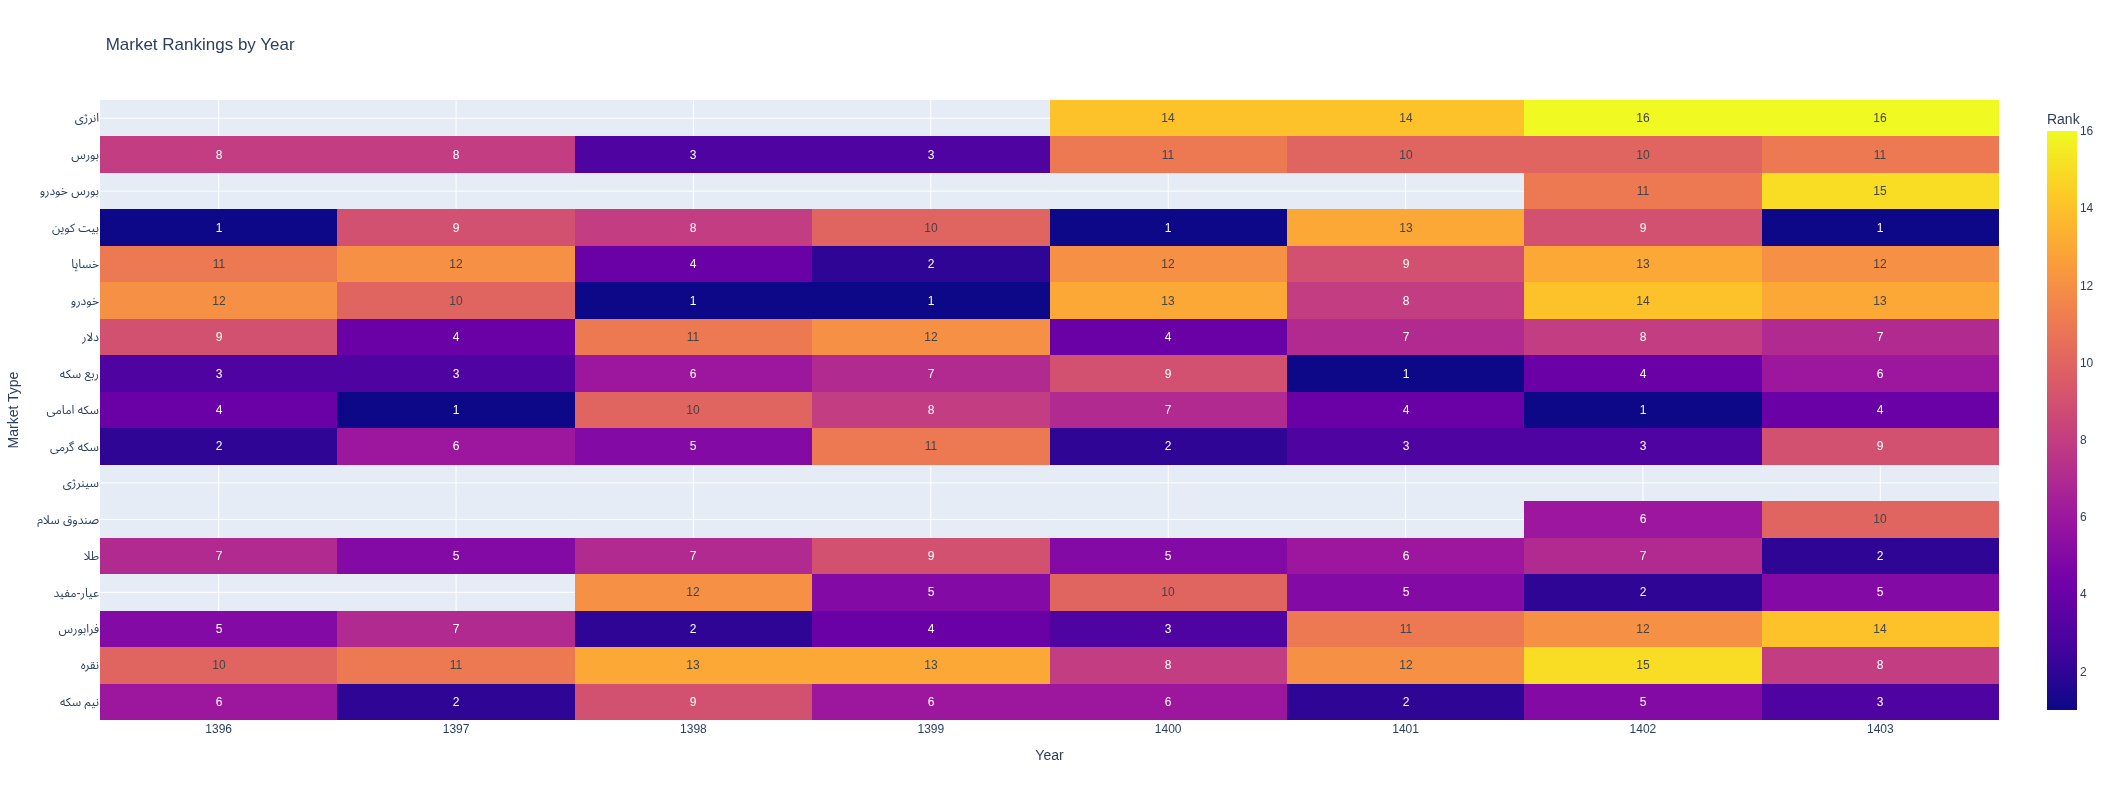

In [9]:
rankings = calculate_market_rankings(df, exclude_years=[1395])
rankings = translate_market_names(rankings)

plot_rankings_heatmap(rankings)

# Average Market Ranks

In [10]:
mean_rank = rankings[rankings['jalali_year'] != 1403].groupby('market_type').agg(
    mean_rank=('rank', 'mean')
).sort_values('mean_rank')

current_rank = rankings[rankings['jalali_year'] == 1403].rename(
    columns={'rank': 'current_rank'}
)

current_rank.merge(mean_rank, on='market_type').sort_values('mean_rank')[
    ['market_type', 'mean_rank', 'current_rank']
]

market_type  mean_rank  current_rank
8     سکه گرمی   4.571429           9.0
5      ربع سکه   4.714286           6.0
3    سکه امامی   5.000000           4.0
2      نیم سکه   5.142857           3.0
9   صندوق سلام   6.000000          10.0
13     فرابورس   6.285714          14.0
1          طلا   6.571429           2.0
4    عیار-مفید   6.800000           5.0
0     بیت کوین   7.285714           1.0
10        بورس   7.571429          11.0
6         دلار   7.857143           7.0
12       خودرو   8.428571          13.0
11       خساپا   9.000000          12.0
14  بورس خودرو  11.000000          15.0
7         نقره  11.714286           8.0
15       انرژی  14.666667          16.0

# Seasonal Market Growth Rate

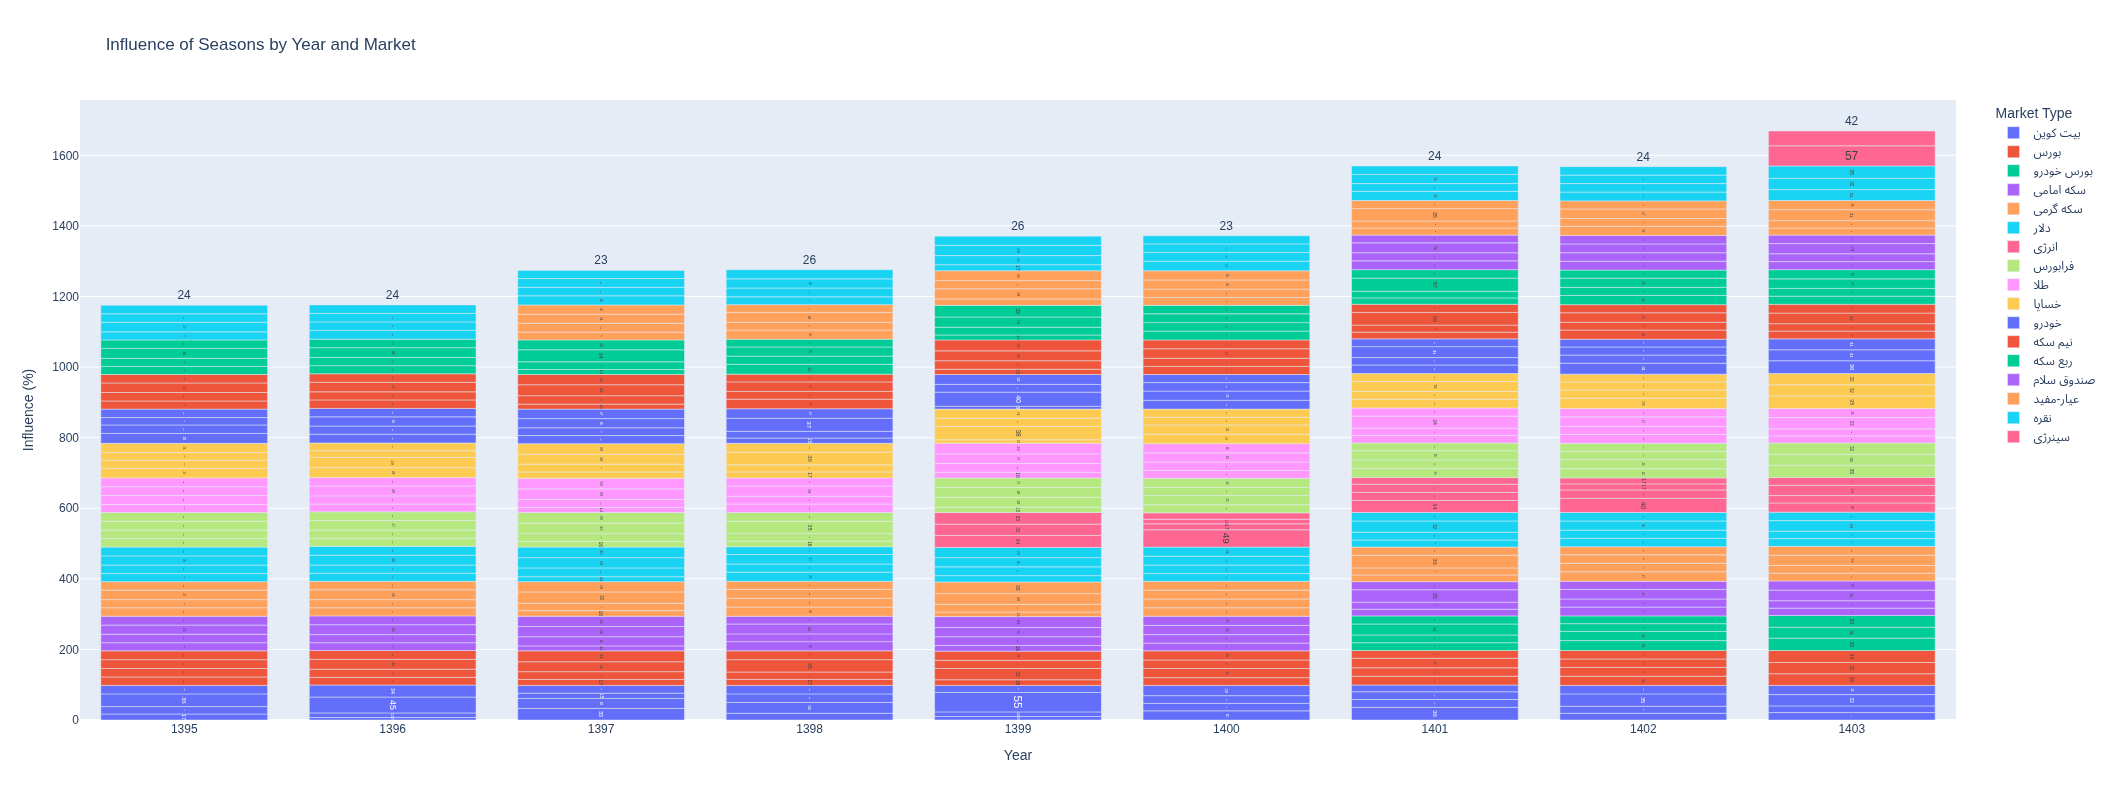

In [11]:
import plotly.express as px

seasonal_data = calculate_seasonal_influence(df)
seasonal_data = translate_market_names(seasonal_data)

fig = px.bar(
    seasonal_data,
    x='jalali_year',
    y='influence_percentage',
    color='market_type',
    title='Influence of Seasons by Year and Market',
    labels={
        'influence_percentage': 'Influence (%)',
        'jalali_year': 'Year',
        'market_type': 'Market Type'
    },
    text='influence_percentage',
    hover_data=['jalali_season']
)
fig.update_layout(
    xaxis=dict(title='Year', tickangle=0),
    yaxis=dict(title='Influence (%)'),
    legend_title='Market Type',
    height=800,
)
fig.show()

# Monthly Growth Rate (Single Market)

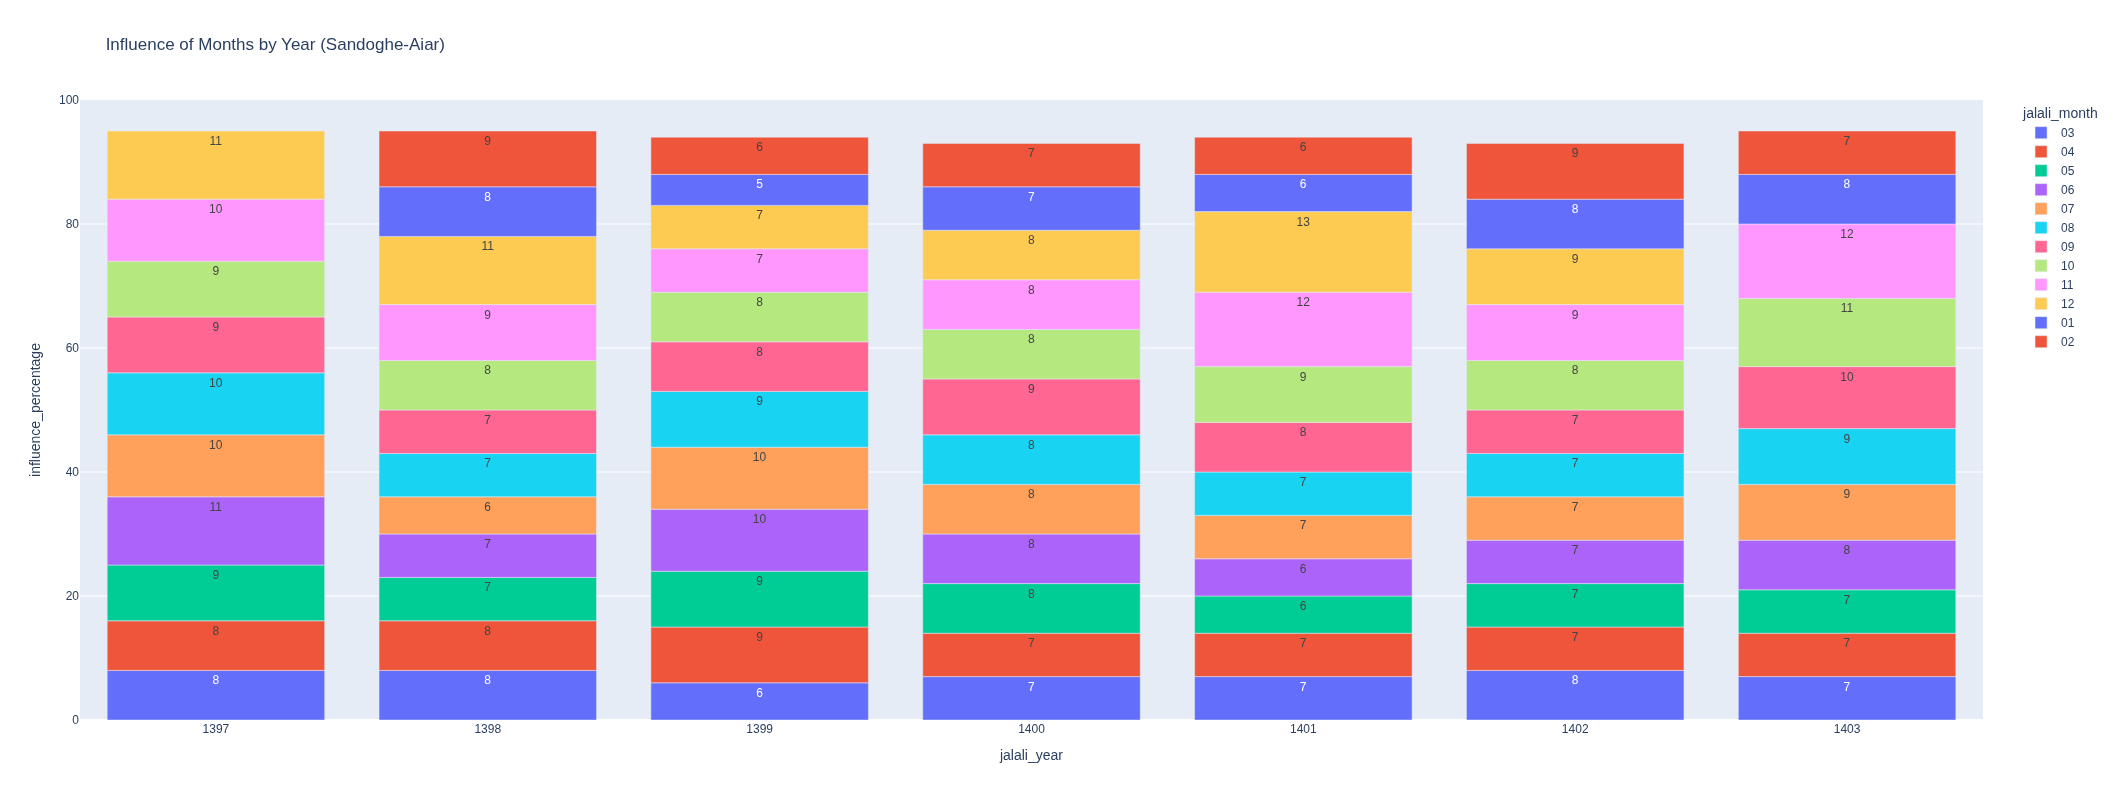

In [12]:
monthly_data = calculate_seasonal_influence(
    df,
    season_col='jalali_month'
)
monthly_data = monthly_data[monthly_data['market_type'] == 'Sandoghe-Aiar']
monthly_data = translate_market_names(monthly_data)

fig = px.bar(
    monthly_data,
    x='jalali_year',
    y='influence_percentage',
    color='jalali_month',
    title='Influence of Months by Year (Sandoghe-Aiar)',
    text='influence_percentage',
)
fig.update_layout(height=800)
fig.show()

# Comparison Over Two Years

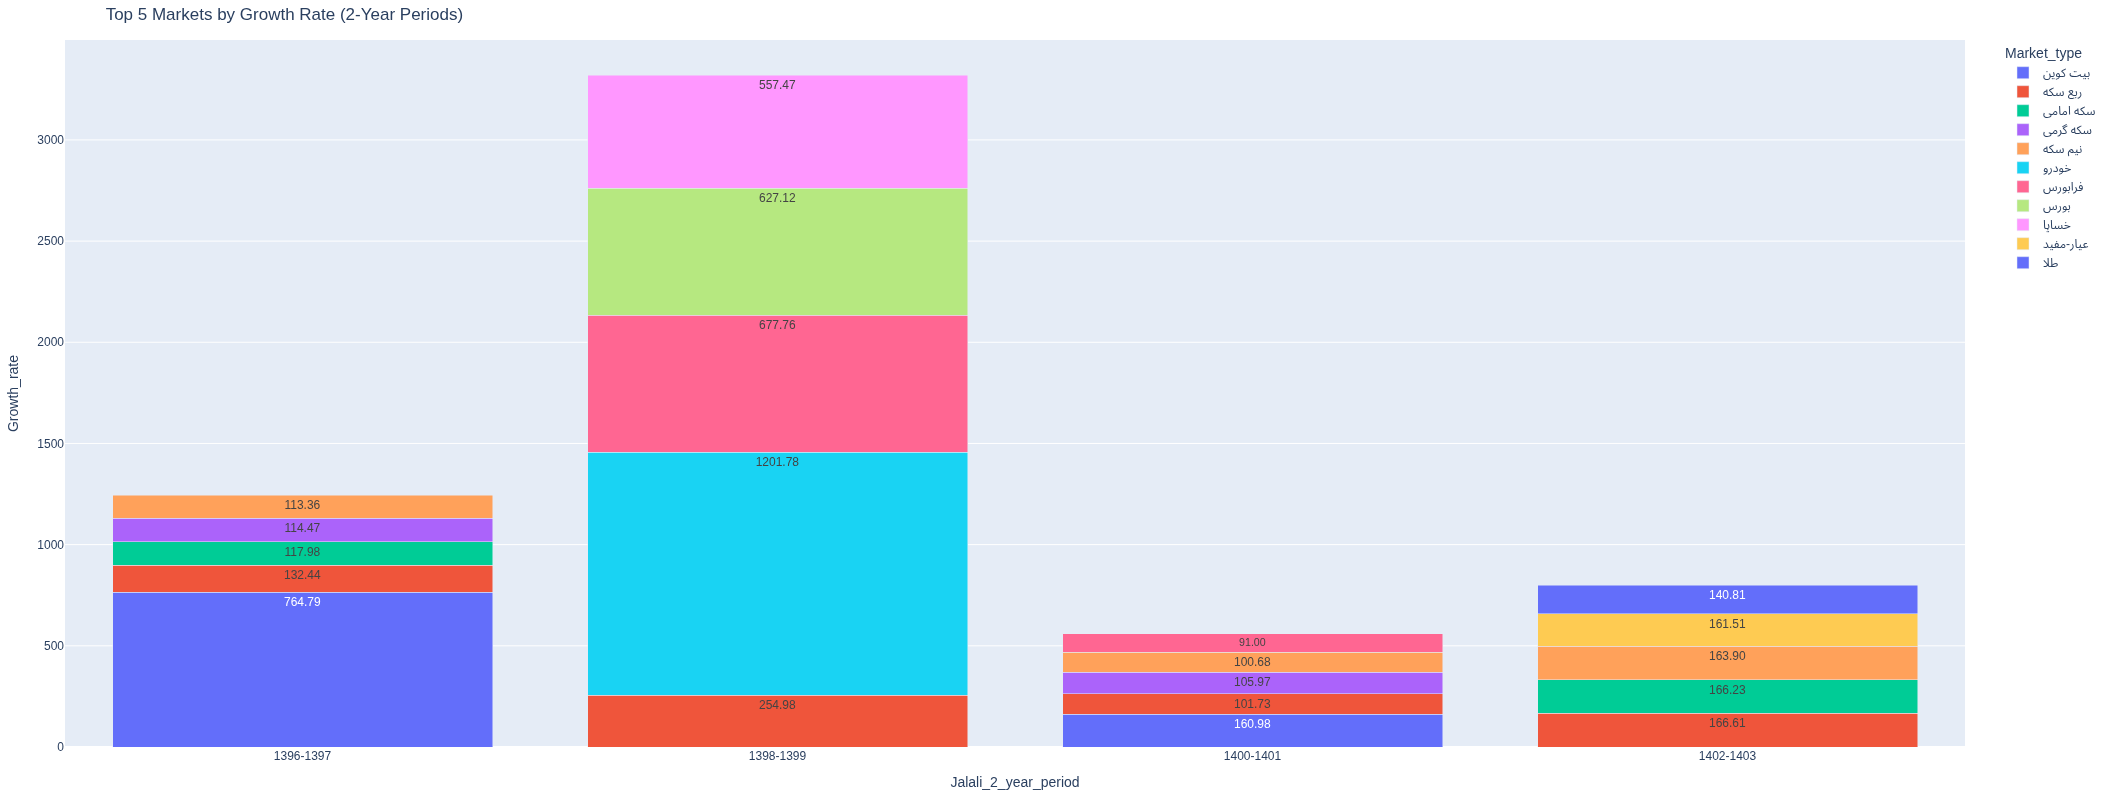

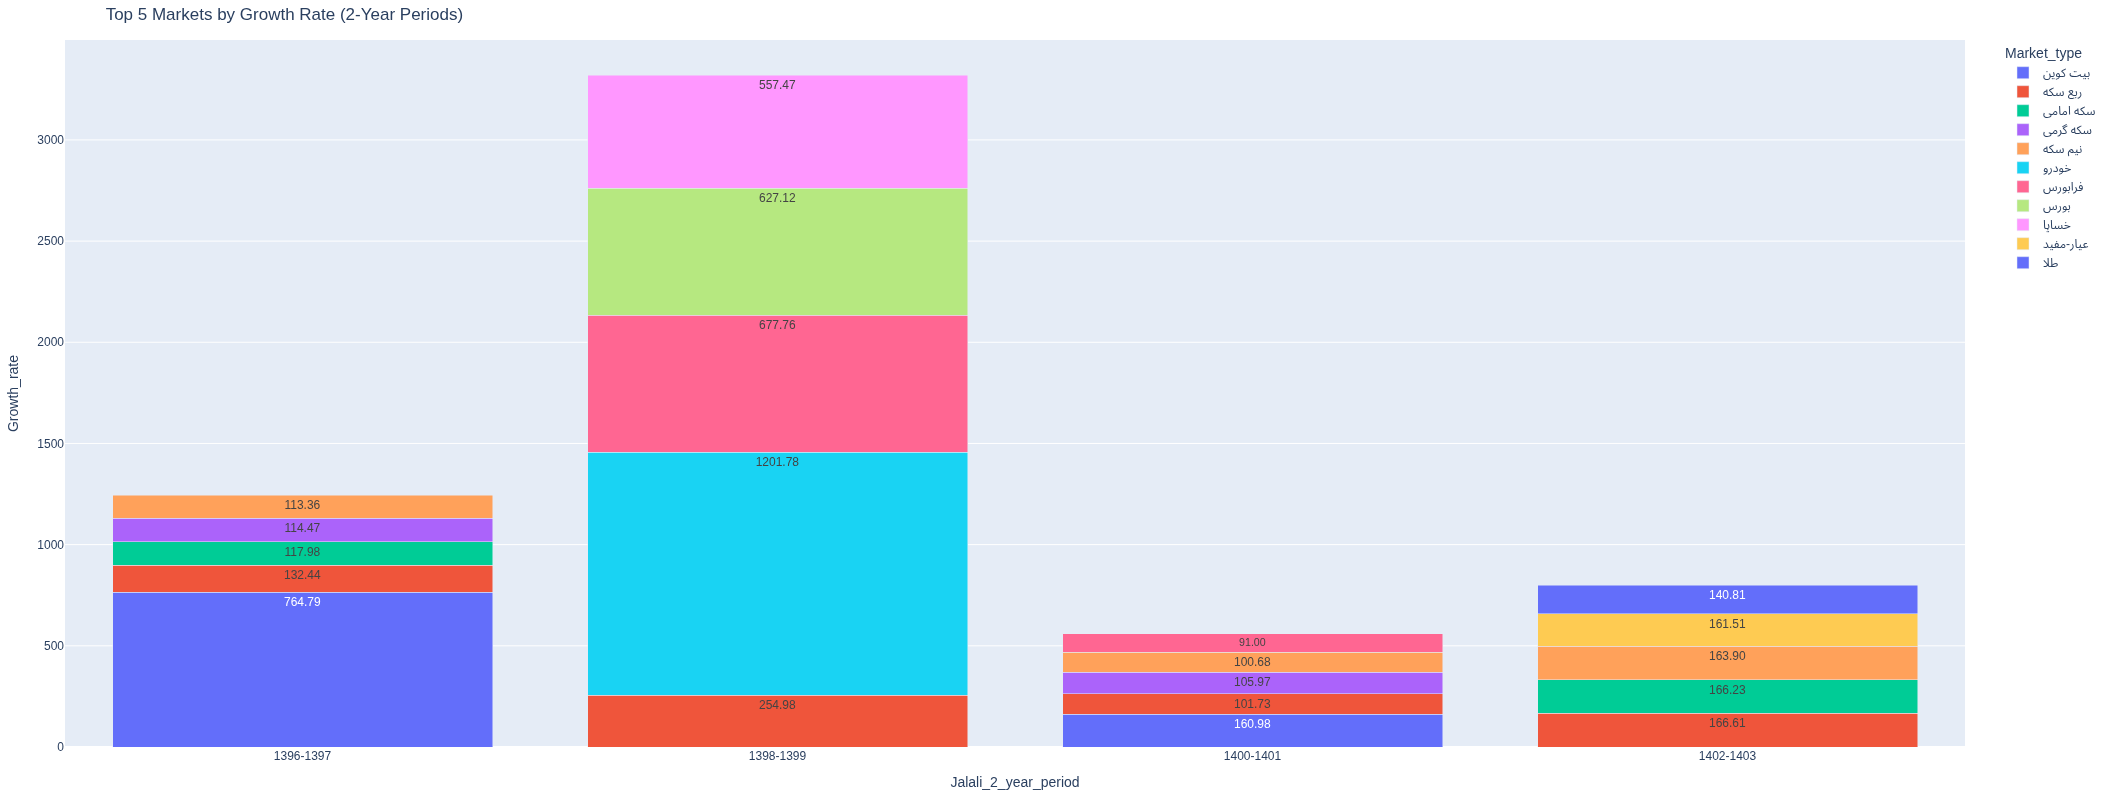

In [13]:
two_year = calculate_growth_rate(df, ['jalali_2_year_period', 'market_type'])
two_year = get_top_markets(two_year, 'jalali_2_year_period', n=5)
two_year = translate_market_names(two_year)
two_year = two_year[two_year['jalali_2_year_period'] != '1394-1395']

set_custom_output_height(800)
plot_stacked_bar_chart(
    df=two_year,
    x_col='jalali_2_year_period',
    y_col='growth_rate',
    color_col='market_type',
    title='Top 5 Markets by Growth Rate (2-Year Periods)',
)

# Comparison Over Three Years

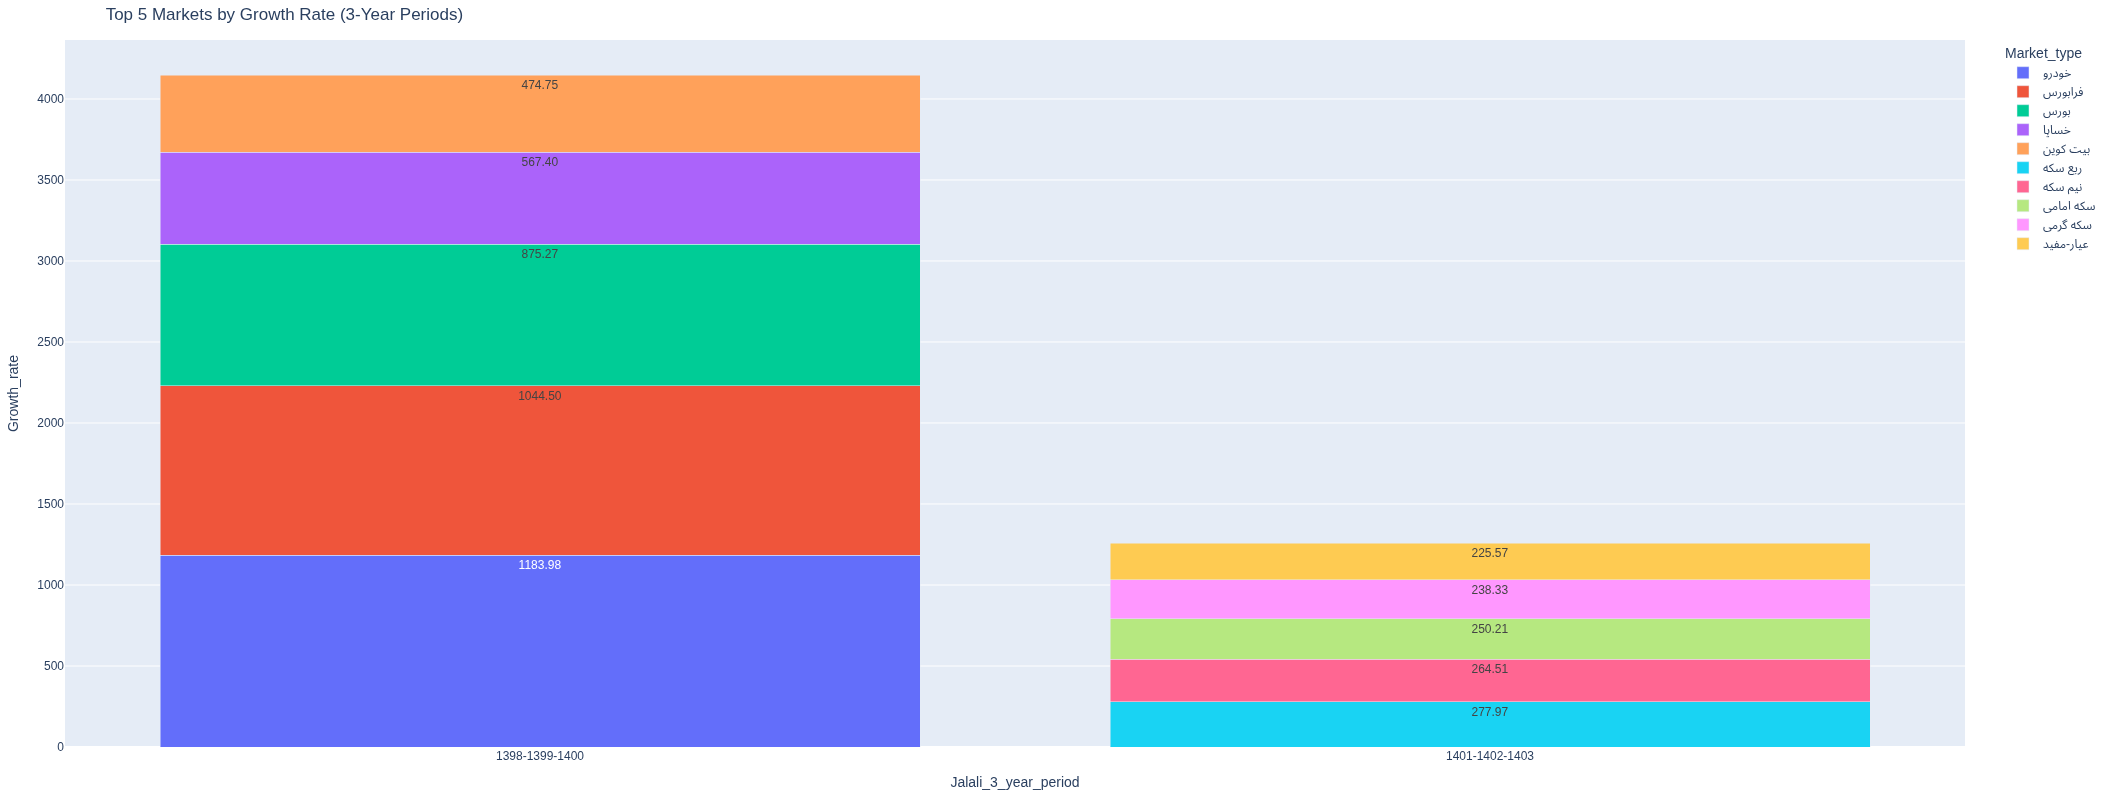

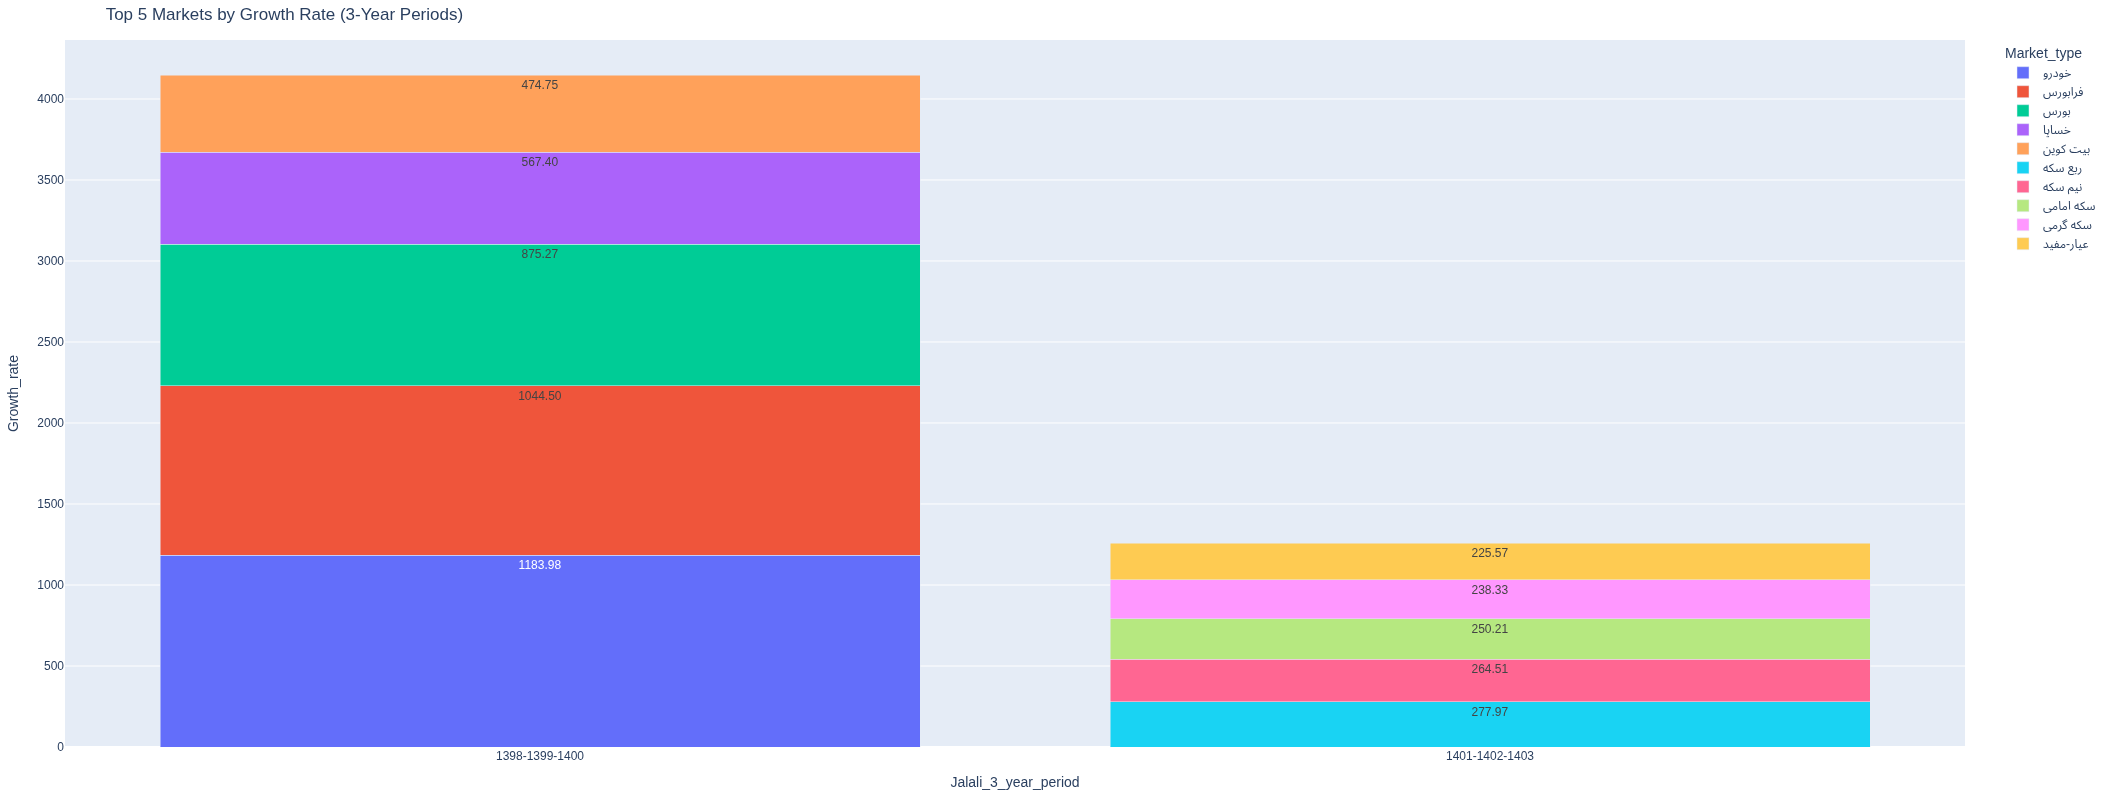

In [14]:
three_year = calculate_growth_rate(df, ['jalali_3_year_period', 'market_type'])
three_year = get_top_markets(three_year, 'jalali_3_year_period', n=5)
three_year = translate_market_names(three_year)
three_year = three_year[three_year['jalali_3_year_period'] != '1395-1396-1397']

set_custom_output_height(800)
plot_stacked_bar_chart(
    df=three_year,
    x_col='jalali_3_year_period',
    y_col='growth_rate',
    color_col='market_type',
    title='Top 5 Markets by Growth Rate (3-Year Periods)',
)

# Comparison Over Four Years

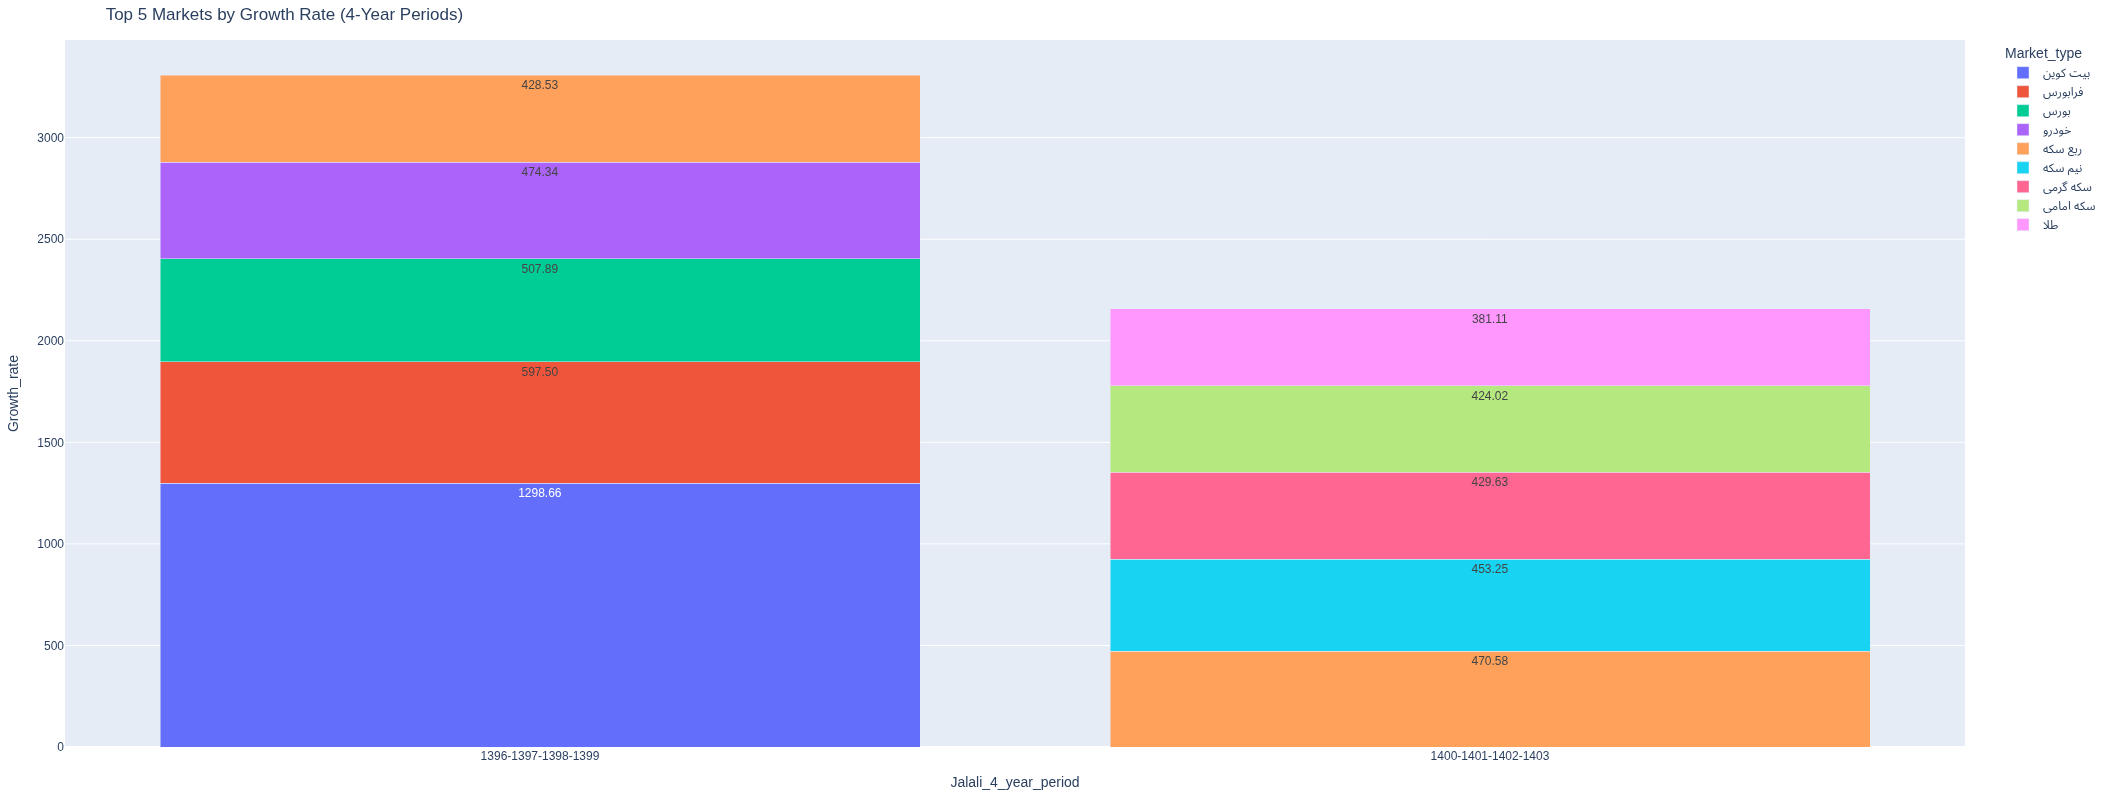

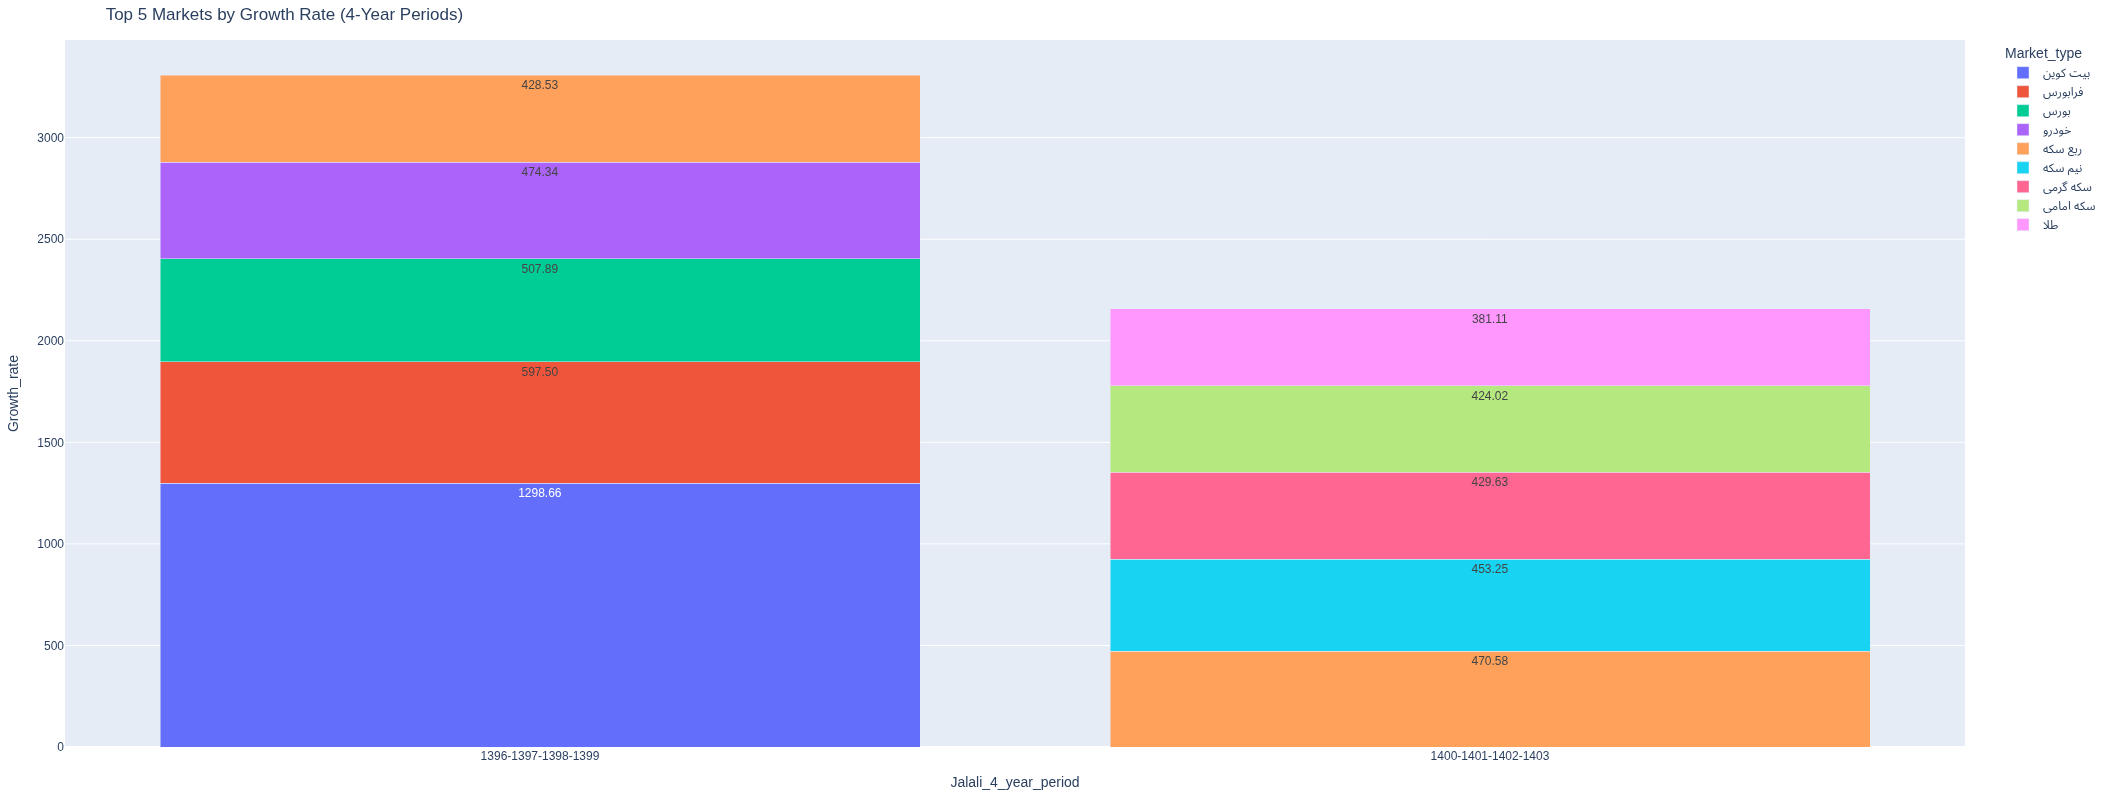

In [15]:
four_year = calculate_growth_rate(df, ['jalali_4_year_period', 'market_type'])
four_year = get_top_markets(four_year, 'jalali_4_year_period', n=5)
four_year = translate_market_names(four_year)
four_year = four_year[four_year['jalali_4_year_period'] != '1392-1393-1394-1395']

set_custom_output_height(800)
plot_stacked_bar_chart(
    df=four_year,
    x_col='jalali_4_year_period',
    y_col='growth_rate',
    color_col='market_type',
    title='Top 5 Markets by Growth Rate (4-Year Periods)',
)

# Market Trends Per Year

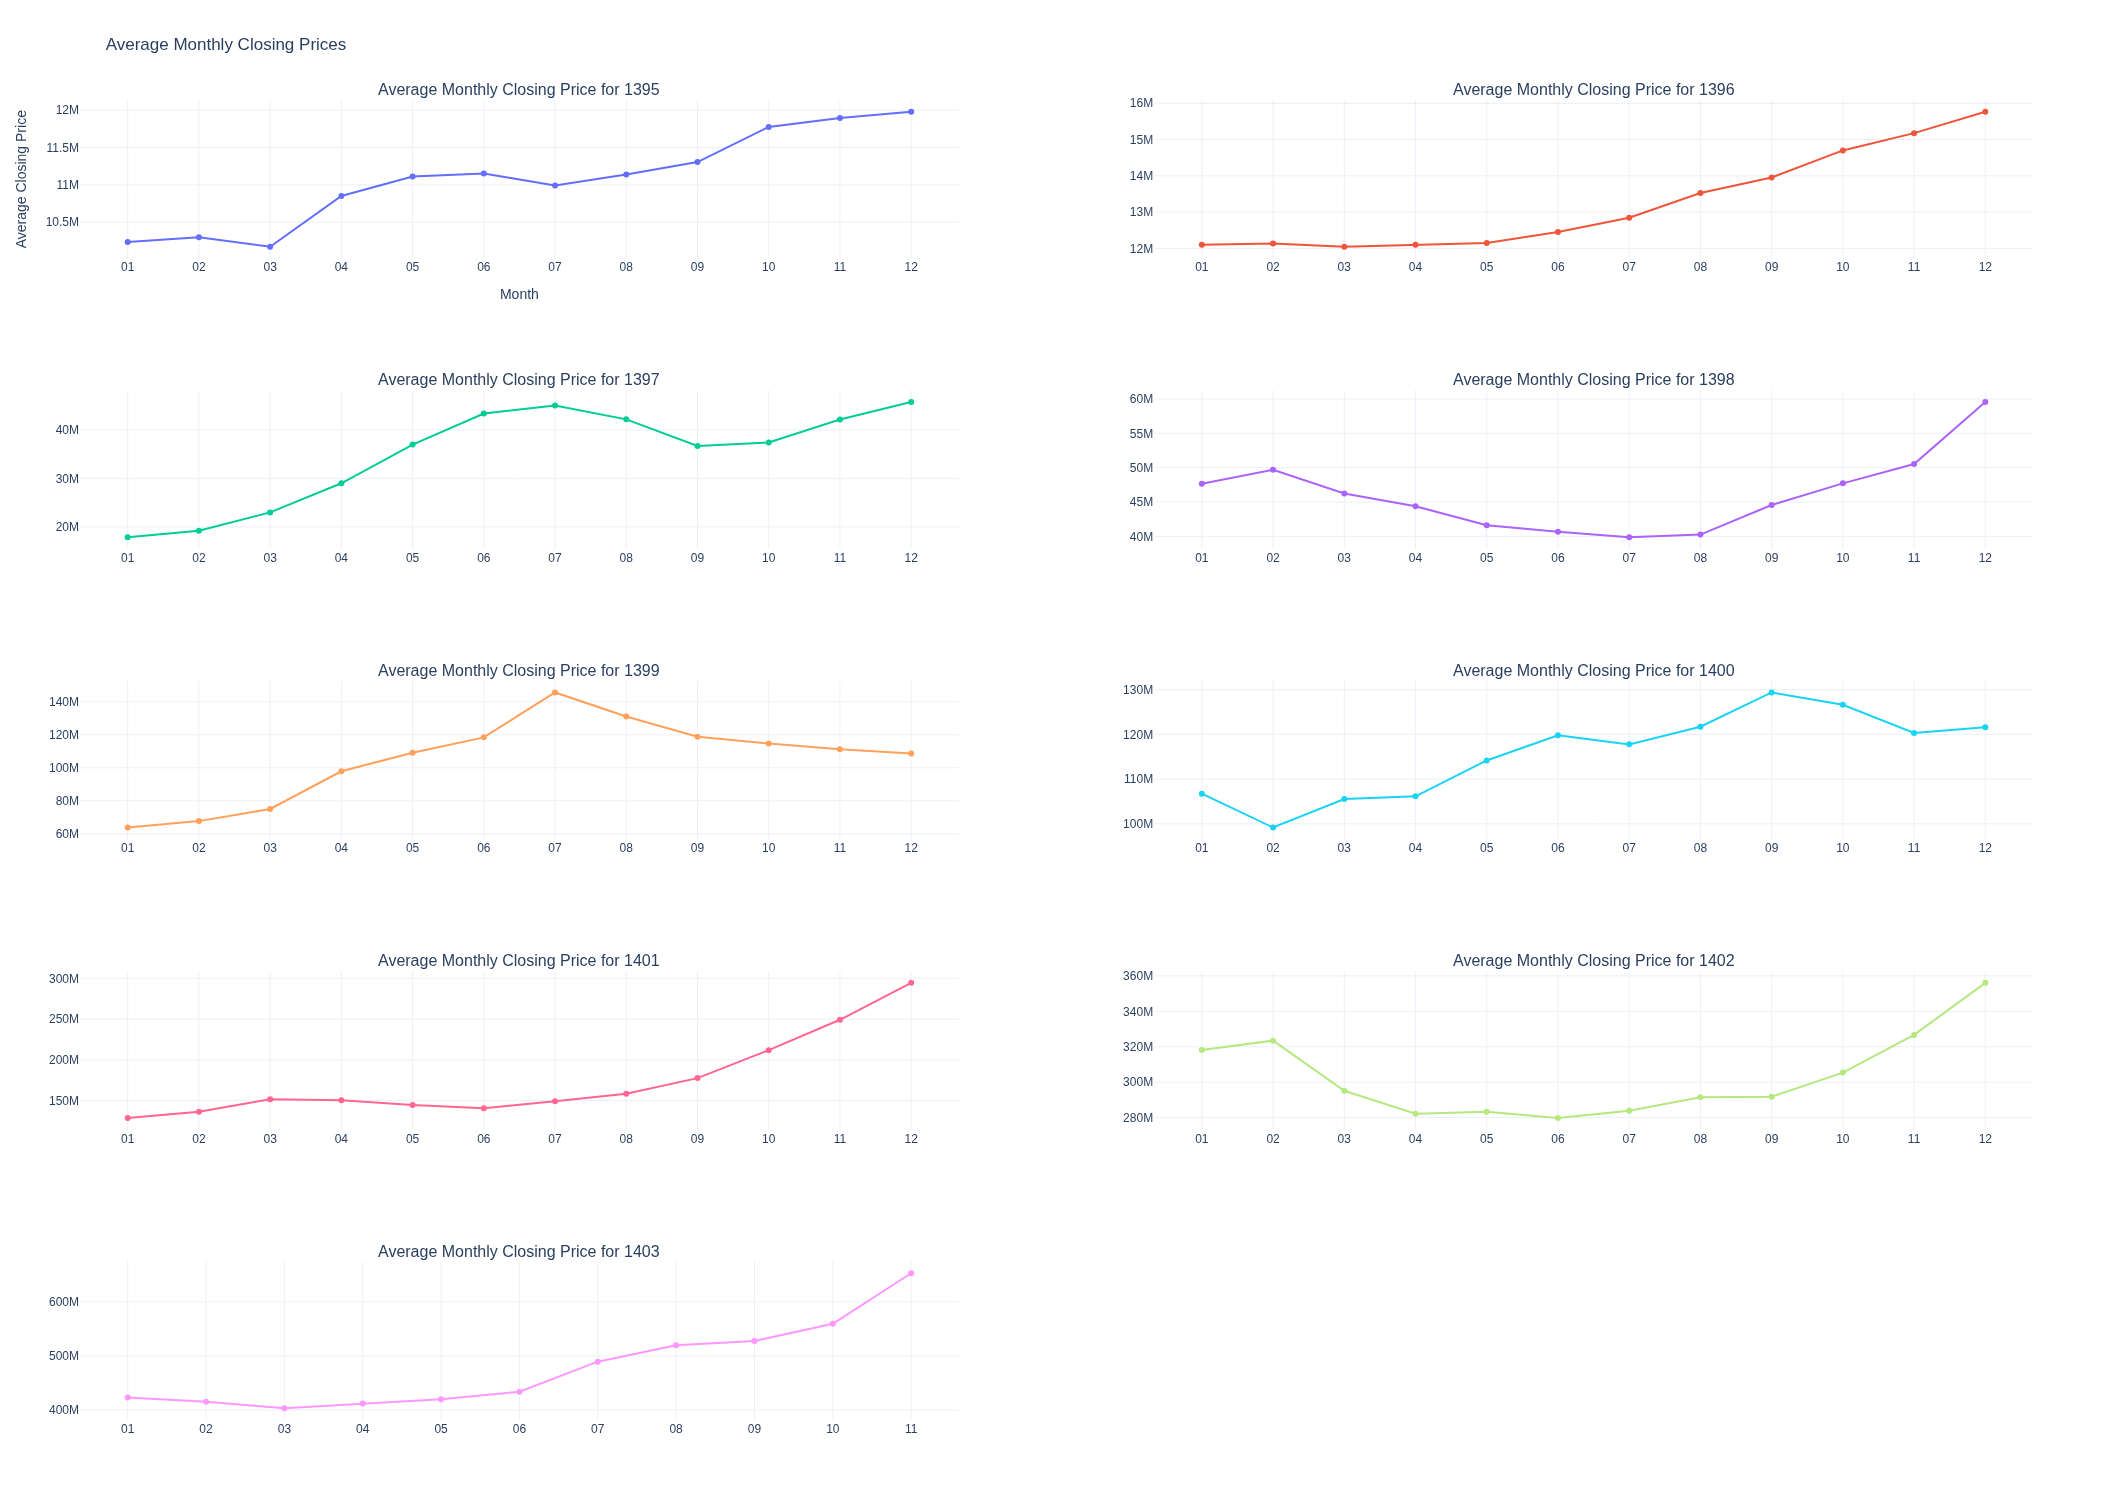

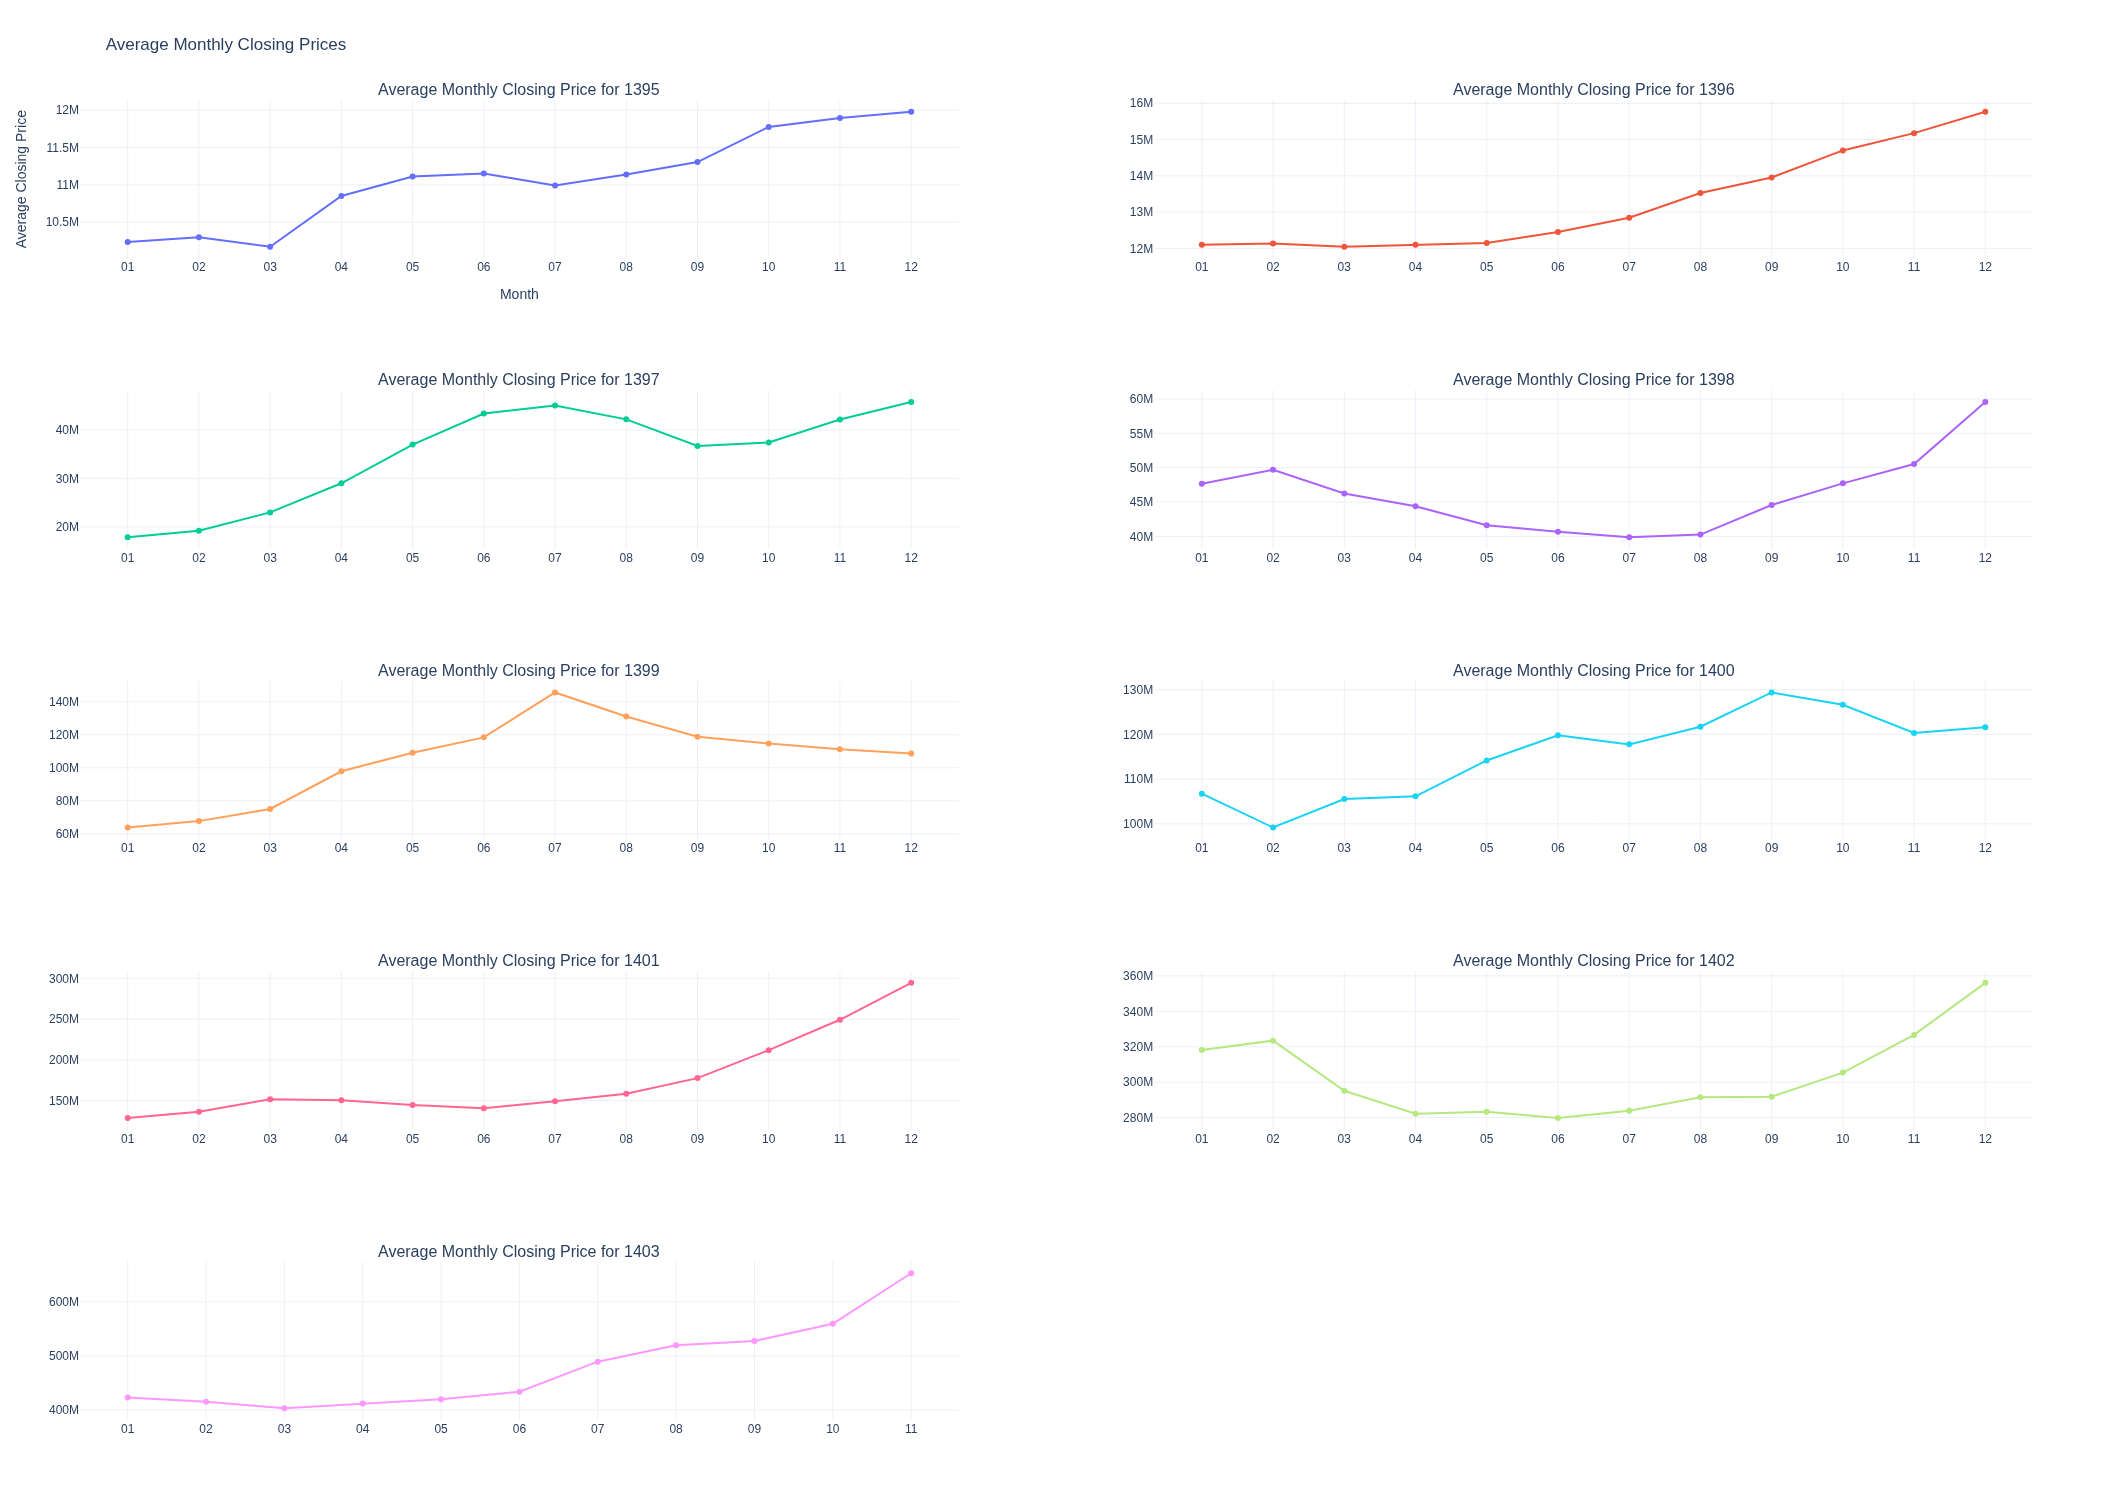

In [16]:
plot_yearly_trends_subplots(df, market='Coin')

# All Markets Comparison (Month 8 vs 12)

In [17]:
comparison = (
    df[df['jalali_month'].isin(['08', '12'])]
    .groupby(['market_type', 'jalali_year', 'jalali_month'])
    .agg(avg_closing_price=('closing', 'mean'))
    .groupby('jalali_year')['avg_closing_price']
    .pct_change() * 100
).reset_index()

comparison['avg_closing_price'] = comparison['avg_closing_price'].fillna(0).astype(int)

comparison[comparison['jalali_month'] == '12'].pivot(
    index='jalali_year',
    columns='market_type',
    values='avg_closing_price'
)

market_type  Bitcoin  Bourse  Bourse-Khodro  Coin  Coin-Gerami  Dollar  \
jalali_year                                                              
1395            65.0    -2.0            NaN   7.0         27.0     3.0   
1396            43.0    10.0            NaN  16.0         29.0    15.0   
1397           -35.0    -7.0            NaN   8.0         28.0     6.0   
1398           -10.0    69.0            NaN  47.0         14.0    33.0   
1399           255.0    -4.0            NaN -17.0        -11.0    -9.0   
1400           -35.0    -6.0            NaN   0.0          3.0    -7.0   
1401            26.0    33.0           42.0  85.0         88.0    46.0   
1402            76.0     5.0           10.0  22.0         10.0    15.0   

market_type  Energy  Fara-Bourse  Gold  Khesapa  Khodro  Nim-Coin  Rob-Coin  \
jalali_year                                                                   
1395            NaN          3.0   2.0    -14.0   -15.0      21.0      26.0   
1396            NaN         11.0  19.0    -16.0     6.0      12.0      26.0   
1397            NaN          5.0   6.0     -8.0     3.0      25.0      39.0   
1398            NaN         71.0  46.0     56.0    50.0      44.0      37.0   
1399          -19.0          7.0 -13.0      0.0   -22.0      -9.0     -16.0   
1400          -42.0        -10.0   0.0      0.0    14.0      11.0       7.0   
1401           35.0         26.0  68.0     25.0    54.0      94.0      88.0   
1402           -1.0          0.0  23.0      9.0    11.0      32.0      24.0   

market_type  Salam  Sandoghe-Aiar  Silver  
jalali_year                                
1395           NaN            NaN     0.0  
1396           NaN            NaN    -2.0  
1397           NaN            5.0     7.0  
1398           NaN           55.0    -6.0  
1399           NaN          -14.0     8.0  
1400           NaN           -1.0     2.0  
1401          43.0           82.0     3.0  
1402           5.0           22.0     3.0